# Problem Statement


Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

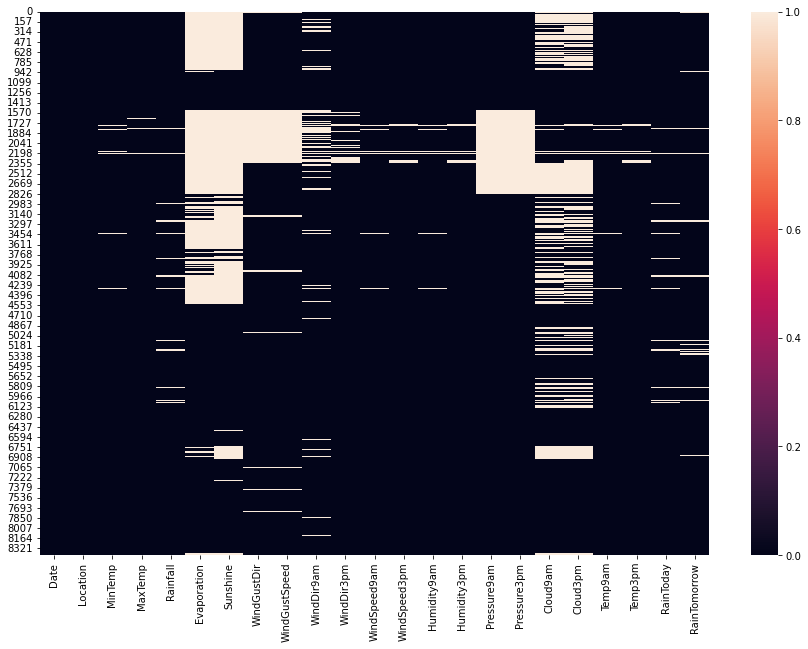

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())


NULL VALUES ARE PRESENT IN ALMOST ALL COLUMNS AND IN SOME COLUMNS UPTO 30 TO 40%

ANALZING ONE BY ONE COLUMNS



 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64

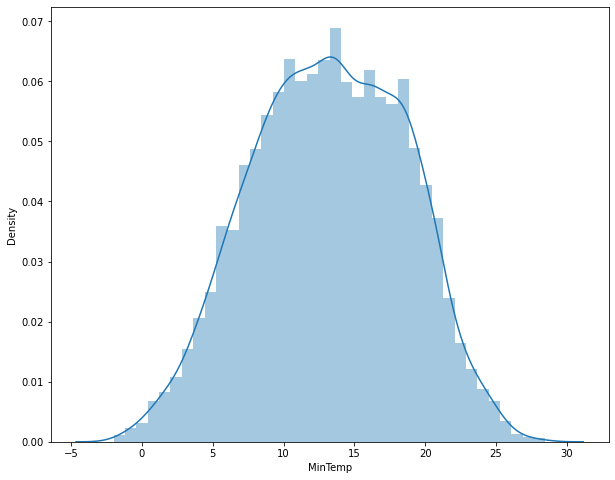

In [7]:
plt.figure(figsize=(10,8))
sns.distplot(df['MinTemp'])
df['MinTemp'].value_counts()

In [8]:
df[df['MinTemp'].isnull()]

Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
284   2009-09-11      Albury      NaN     18.8       NaN          NaN   
444   2010-02-18      Albury      NaN     31.2       NaN          NaN   
453   2010-02-27      Albury      NaN     26.3       NaN          NaN   
459   2010-03-05      Albury      NaN     22.3       0.0          NaN   
612   2010-08-05      Albury      NaN     11.8       NaN          NaN   
...          ...         ...      ...      ...       ...          ...   
4289  2008-12-01  Wollongong      NaN      NaN       NaN          NaN   
4290  2008-12-02  Wollongong      NaN      NaN       NaN          NaN   
4291  2008-12-03  Wollongong      NaN     27.4       NaN          NaN   
4466  2009-05-27  Wollongong      NaN     18.6       NaN          NaN   
6495  2012-01-31    Brisbane      NaN      NaN       0.0          6.2   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
284        NaN           N           31.0         SE  ...        83.0   
444        NaN         ESE           31.0        SSE  ...        33.0   
453        NaN          NE           26.0         SE  ...        70.0   
459        NaN          NE           37.0         NE  ...        74.0   
612        NaN         WSW           28.0          N  ...        97.0   
...        ...         ...            ...        ...  ...         ...   
4289       NaN         NaN            NaN        NaN  ...         NaN   
4290       NaN         NaN            NaN        NaN  ...         NaN   
4291       NaN         SSE           70.0        NaN  ...         NaN   
4466       NaN         SSE           24.0        NaN  ...         NaN   
6495      10.6         NaN            NaN          N  ...         NaN   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
284          46.0       1022.2       1018.2       NaN       NaN      8.7   
444          24.0       1020.4       1019.1       NaN       NaN     21.0   
453          62.0       1019.4       1018.3       2.0       2.0     20.8   
459          93.0       1008.8       1006.6       8.0       8.0     20.9   
612          65.0       1019.5       1018.3       7.0       4.0      6.7   
...           ...          ...          ...       ...       ...      ...   
4289          NaN       1007.9       1003.3       NaN       NaN      NaN   
4290          NaN       1010.9       1006.8       NaN       NaN      NaN   
4291         63.0       1007.8       1005.8       NaN       NaN      NaN   
4466         87.0       1020.0       1018.5       NaN       8.0      NaN   
6495         60.0       1008.5       1005.8       4.0       3.0      NaN   

      Temp3pm  RainToday  RainTomorrow  
284      18.1        NaN            No  
444      30.0        NaN            No  
453      24.8        NaN           Yes  
459      20.1         No           Yes  
612      11.3        NaN            No  
...       ...        ...           ...  
4289      NaN        NaN           NaN  
4290      NaN        NaN           NaN  
4291     23.9        NaN            No  
4466     16.5        NaN           Yes  
6495     28.9         No           NaN  

[75 rows x 23 columns]

min temp should be less than max temp of day

so mean value of temp min is less than max temp except for 1-2 case.

In [9]:
df['MinTemp'].mean() #fill nan with mean

13.193305389221573

In [10]:
df.sample()

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
4196  2017-03-25  Williamtown     17.0     25.6       0.2          NaN   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
4196       NaN          SE           28.0        WSW  ...        81.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
4196         68.0       1017.3       1014.0       NaN       8.0     20.4   

      Temp3pm  RainToday  RainTomorrow  
4196     23.5         No            No  

[1 rows x 23 columns]

19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64

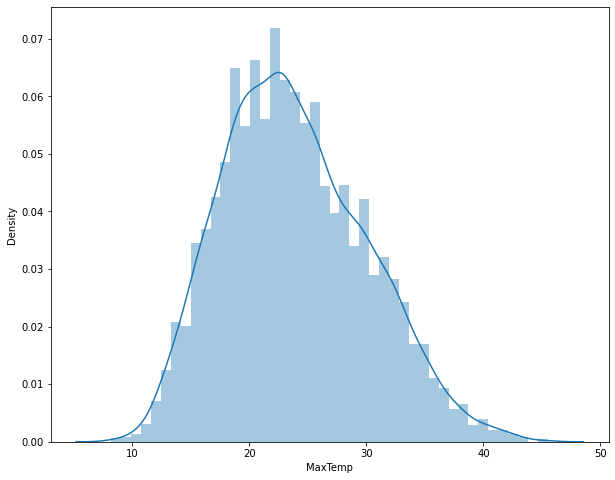

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(df['MaxTemp'])
df['MaxTemp'].value_counts()

In [12]:
df[df['MaxTemp'].isnull()]

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
283   2009-09-10        Albury      2.6      NaN       0.0          NaN   
452   2010-02-26        Albury     17.2      NaN       0.0          NaN   
455   2010-03-01        Albury     14.4      NaN       0.0          NaN   
458   2010-03-04        Albury     15.1      NaN       0.0          NaN   
464   2010-03-10        Albury      8.8      NaN       0.0          NaN   
1188  2009-12-16  CoffsHarbour     19.2      NaN       0.0          3.8   
1561  2013-07-22     Newcastle      2.9      NaN       0.0          NaN   
1562  2013-07-23     Newcastle      NaN      NaN       0.0          NaN   
1611  2013-09-10     Newcastle     15.2      NaN       0.0          NaN   
1657  2013-10-26     Newcastle      9.8      NaN       0.0          NaN   
1716  2013-12-24     Newcastle     18.4      NaN       4.4          NaN   
1725  2014-01-02     Newcastle     21.6      NaN       0.6          NaN   
1735  2014-01-12     Newcastle     18.2      NaN       0.0          NaN   
1736  2014-01-13     Newcastle      NaN      NaN       0.0          NaN   
1737  2014-01-14     Newcastle      NaN      NaN       0.0          NaN   
1738  2014-01-15     Newcastle      NaN      NaN       0.0          NaN   
1755  2014-02-01     Newcastle     19.2      NaN       0.0          NaN   
1764  2014-02-10     Newcastle     17.8      NaN       0.0          NaN   
1812  2014-03-30     Newcastle     17.0      NaN       NaN          NaN   
1813  2014-03-31     Newcastle      NaN      NaN       NaN          NaN   
1814  2014-04-01     Newcastle      NaN      NaN       NaN          NaN   
1815  2014-04-02     Newcastle      NaN      NaN       NaN          NaN   
1816  2014-04-03     Newcastle      NaN      NaN       NaN          NaN   
1817  2014-04-04     Newcastle      NaN      NaN       NaN          NaN   
1826  2014-04-13     Newcastle     15.5      NaN       0.0          NaN   
1836  2014-04-23     Newcastle     17.0      NaN       0.0          NaN   
1850  2014-05-07     Newcastle     11.4      NaN       0.0          NaN   
1913  2014-07-09     Newcastle      2.2      NaN       0.0          NaN   
1953  2014-08-18     Newcastle      9.6      NaN       0.6          NaN   
1986  2014-09-20     Newcastle      5.7      NaN       0.0          NaN   
2068  2014-12-11     Newcastle     20.5      NaN      17.2          NaN   
2081  2014-12-24     Newcastle     18.5      NaN       1.2          NaN   
2126  2015-02-07     Newcastle     15.5      NaN       0.2          NaN   
2133  2015-02-14     Newcastle     19.0      NaN       0.0          NaN   
2162  2015-03-15     Newcastle     14.2      NaN       0.0          NaN   
2163  2015-03-16     Newcastle      NaN      NaN      20.0          NaN   
2164  2015-03-17     Newcastle      NaN      NaN       NaN          NaN   
2165  2015-03-18     Newcastle      NaN      NaN       NaN          NaN   
2166  2015-03-19     Newcastle      NaN      NaN       NaN          NaN   
2167  2015-03-20     Newcastle      NaN      NaN       NaN          NaN   
2174  2015-03-27     Newcastle     11.5      NaN       0.0          NaN   
2198  2015-04-20     Newcastle     13.9      NaN       3.0          NaN   
2199  2015-04-21     Newcastle      NaN      NaN       NaN          NaN   
2207  2015-04-29     Newcastle     12.2      NaN       7.0          NaN   
2227  2015-05-19     Newcastle     12.0      NaN       0.1          NaN   
2234  2015-05-26     Newcastle      7.8      NaN       0.0          NaN   
2286  2015-07-17     Newcastle      5.1      NaN       0.0          NaN   
2288  2015-07-19     Newcastle      8.5      NaN       2.2          NaN   
2290  2015-07-21     Newcastle      5.5      NaN       0.4          NaN   
2303  2015-08-03     Newcastle     10.8      NaN       0.0          NaN   
2304  2015-08-04     Newcastle      6.4      NaN       0.0          NaN   
2319  2015-08-19     Newcastle      5.8      NaN       0.0          NaN   
3437  2008-12-01    Wollongong      N

In [13]:
df['MaxTemp'].mean()

23.85997609085473

max temp is alwyas greater than min temp before and after filling nan values

so replacing nan values of temp max with mean



0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

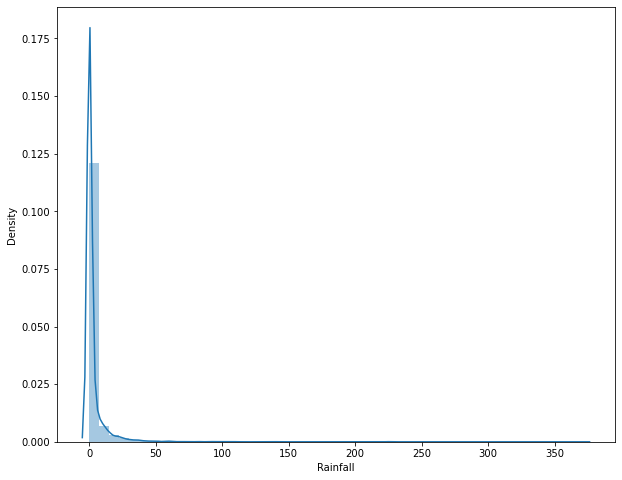

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(df['Rainfall'])
df['Rainfall'].value_counts()

here rainfall is maximum in range 0 to 4

so replacing nan with mode i.e. 0



4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64

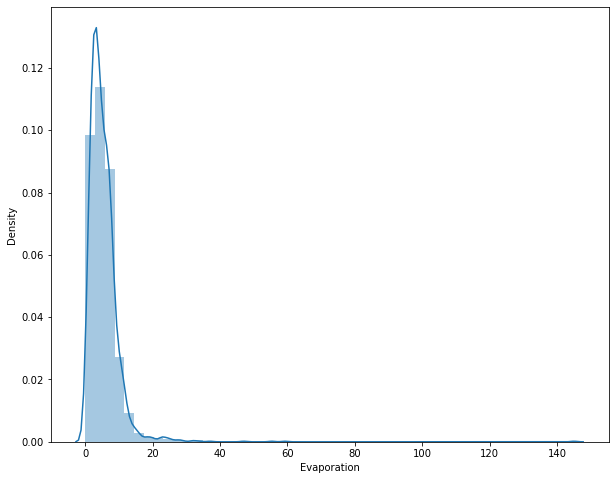

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(df['Evaporation'])
df['Evaporation'].value_counts()

here also the data is skewed right and the missing values can be filled with its mode.



In [16]:
df['Evaporation'].mode()

0    4.0
Name: Evaporation, dtype: float64

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

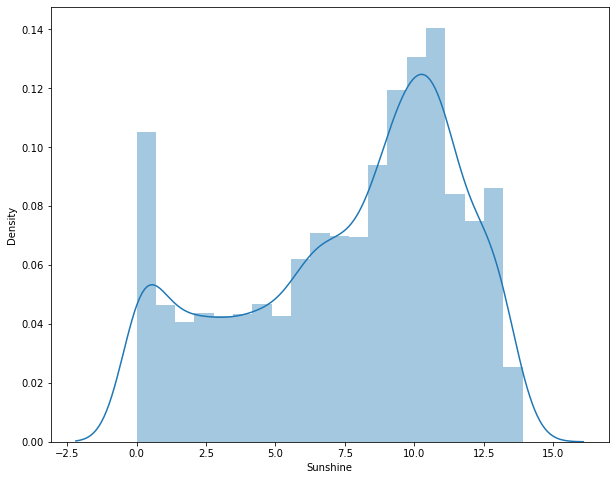

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(df['Sunshine'])
df['Sunshine'].value_counts()


sunshine is seen throughout the year and as seen from graph the distribution is seen.

missing values of shunshine can be filled with mode, as 0 shunshine is seen.



39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0     367
28.0     332
43.0     302
48.0     292
26.0     275
50.0     259
46.0     258
24.0     255
52.0     249
44.0     241
22.0     223
54.0     210
20.0     186
56.0     153
57.0     148
19.0     137
61.0     114
59.0     113
63.0      95
17.0      92
65.0      74
67.0      64
72.0      62
15.0      58
13.0      57
74.0      54
70.0      53
69.0      49
76.0      44
78.0      23
80.0      22
11.0      18
85.0      14
81.0      13
91.0      12
93.0       7
89.0       7
83.0       6
9.0        6
98.0       4
94.0       3
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: WindGustSpeed, dtype: int64

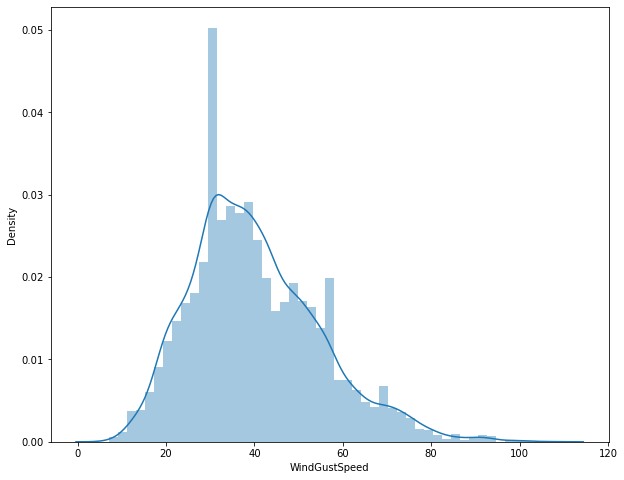

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(df['WindGustSpeed'])
df['WindGustSpeed'].value_counts()

DATA IS NORMALLY DISTRIBUTED AND HENCE NAN CAN BE REPLACED WITH MEAN.



9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

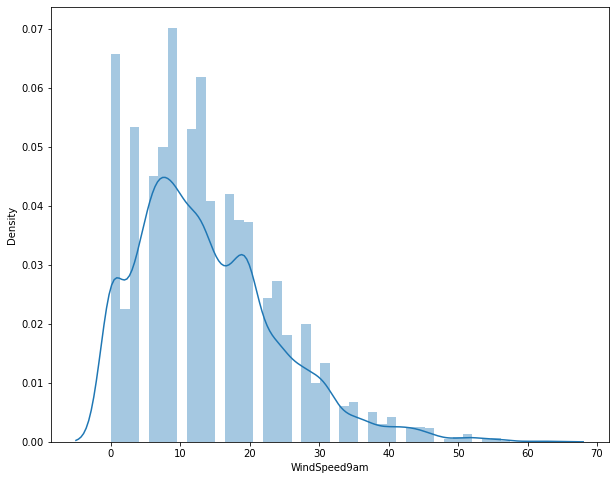

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(df['WindSpeed9am'])
df['WindSpeed9am'].value_counts()


as seen from graphcan replace missing values by mean as the data is distributed and hav speed upto 60



9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64

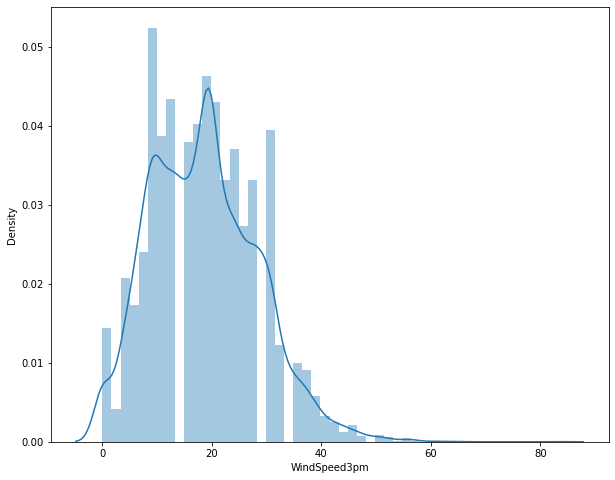

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(df['WindSpeed3pm'])
df['WindSpeed3pm'].value_counts()


In [21]:
df['WindSpeed3pm'].mean() #replace missing value with mean

18.533661937965856

73.0    205
62.0    202
68.0    199
74.0    195
70.0    188
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64

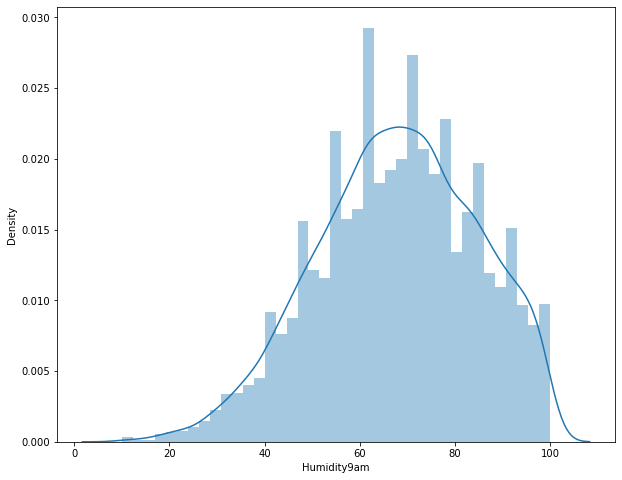

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(df['Humidity9am'])
df['Humidity9am'].value_counts()


data for humidity at 9am is distributed and has a good range so replacing nan with mean



55.0    195
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64

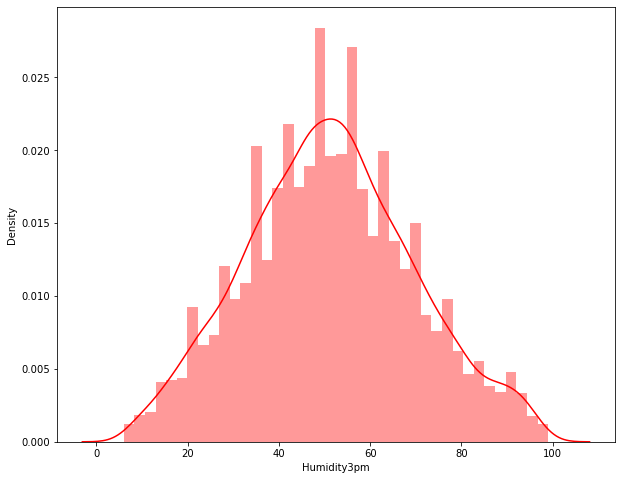

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(df['Humidity3pm'],color='r')
df['Humidity3pm'].value_counts()

data is normally distributed ,so replacing nan with mean

1014.8    58
1019.2    55
1016.1    54
1019.6    53
1020.0    49
          ..
1037.3     1
997.8      1
1036.9     1
1036.3     1
1033.6     1
Name: Pressure9am, Length: 384, dtype: int64

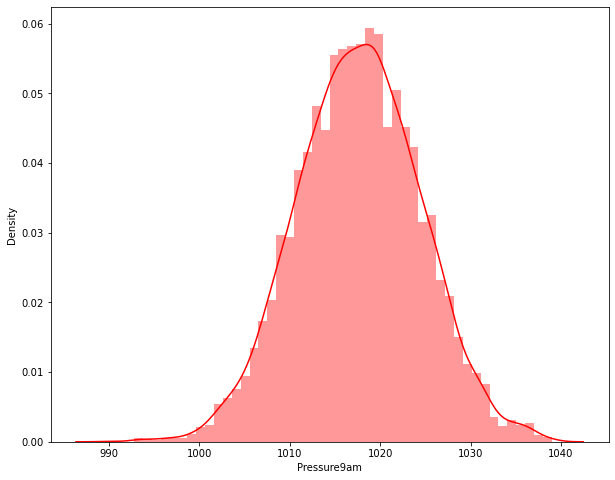

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(df['Pressure9am'],color='r')
df['Pressure9am'].value_counts()


Pressure9am is showing good distibution curve ,so replacing nan with mean

1017.8    60
1018.0    57
1019.8    53
1017.9    53
1015.5    52
          ..
982.9      1
994.3      1
998.9      1
1030.0     1
1029.5     1
Name: Pressure3pm, Length: 374, dtype: int64

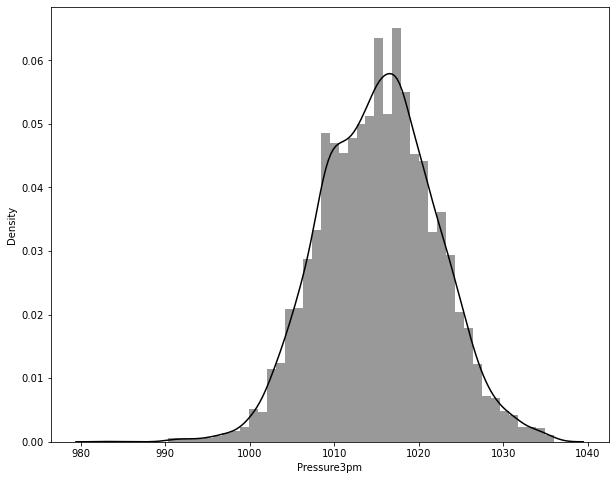

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(df['Pressure3pm'],color='k')
df['Pressure3pm'].value_counts()


replace missing values with mean



7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64

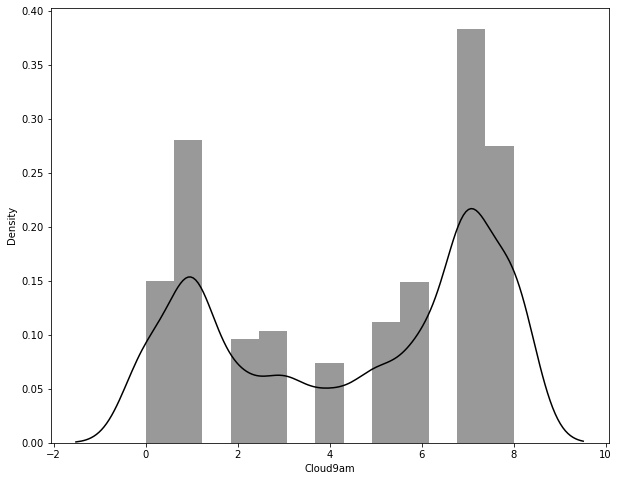

In [26]:
plt.figure(figsize=(10,8))
sns.distplot(df['Cloud9am'],color='k')
df['Cloud9am'].value_counts()


replacing nan with mode

7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64

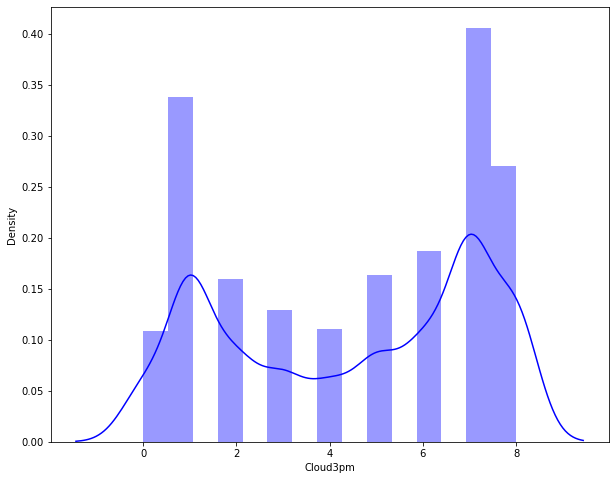

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df['Cloud3pm'],color='b')
df['Cloud3pm'].value_counts()

14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 304, dtype: int64

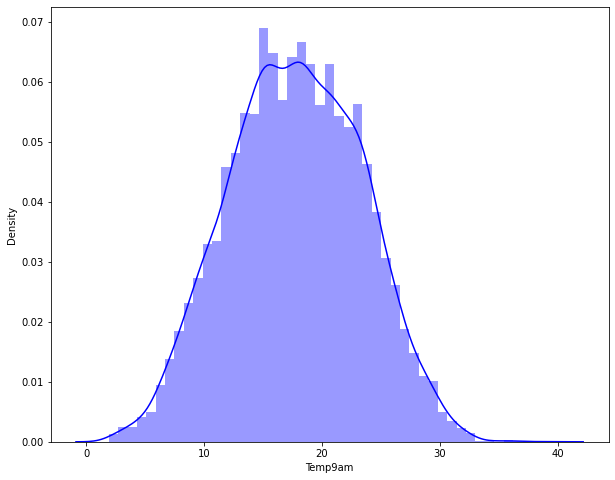

In [28]:
#replace nan with mode

plt.figure(figsize=(10,8))
sns.distplot(df['Temp9am'],color='b')
df['Temp9am'].value_counts()

19.2    78
22.5    77
19.0    75
21.7    72
18.5    72
        ..
37.4     1
8.7      1
36.7     1
8.6      1
42.4     1
Name: Temp3pm, Length: 328, dtype: int64

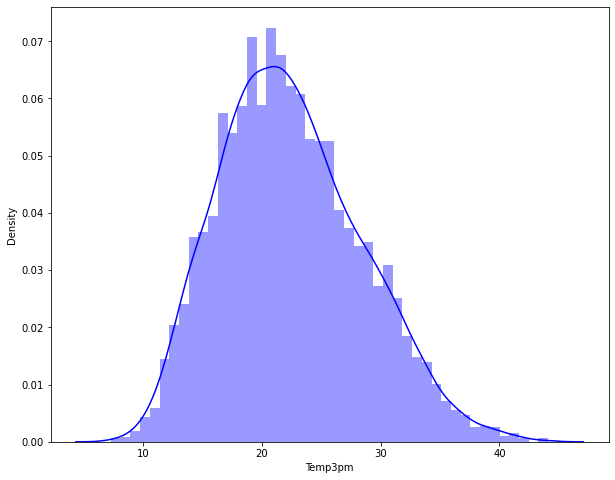

In [29]:
#replacing nan with mean as data is normally distributed

plt.figure(figsize=(10,8))
sns.distplot(df['Temp3pm'],color='b')
df['Temp3pm'].value_counts()


In [30]:
#replacing nan with mean

# fillinf missing values
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())


df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mode().max())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mode().max())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mode().max())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mode().max())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mode().max())

NOW ONLY CATEGORIAL DATA IS LEFT WITH NULL VALUES,AND CAN BE REPLACED WITH ITS MODE

AS SEEN FROM ABOVE GRAPH

WINDGUSTDIR IS MAXIMUM FROM NORTH AND LEAST FROM NNW,CAN REPLACE NAN WITH MODE i.e. N

WINDDIR AT 9AM IS HIGH FROM NORTH AND AT 3PM ITS HIGH WITH SE,HENCE REPLACING NAN WITH THEIR MODE.

RAIN TODAY AND TOMORROW MISSING VALUES CAN BE REPLACED WITH THEIR MODE.



In [31]:
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode().max())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode().max())
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode().max())
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode().max())
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode().max())
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          4.0       0.0   
1  2008-12-02   Albury      7.4     25.1       0.0          4.0       0.0   
2  2008-12-03   Albury     12.9     25.7       0.0          4.0       0.0   
3  2008-12-04   Albury      9.2     28.0       0.0          4.0       0.0   
4  2008-12-05   Albury     17.5     32.3       1.0          4.0       0.0   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       7.0     16.9     21.8         No   
1       1010.6       1007.8       7.0       7.0     17.2     24.3         No   
2       1007.6       1008.7       7.0       2.0     21.0     23.2         No   
3       1017.6       1012.8       7.0       7.0     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [32]:
df.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

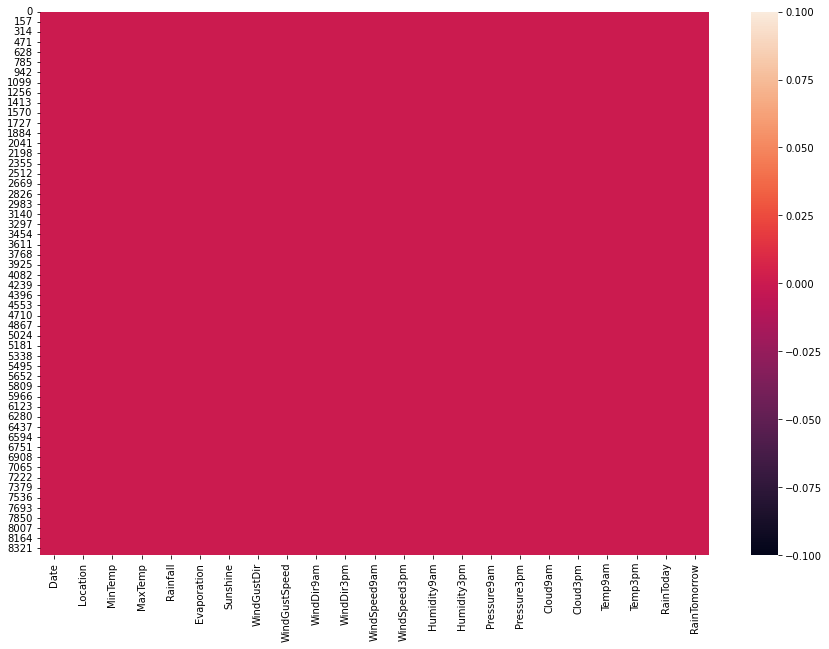

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

# (EDA) EXPLORATORY DATA ANALYSIS


In [34]:
df.describe()


MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.725982     4.810220     4.014042   
std       5.379488     6.114516    10.319872     3.912448     4.744297   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     0.000000   
50%      13.200000    23.300000     0.000000     4.000000     0.200000   
75%      17.300000    28.000000     0.800000     5.200000     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     5.265875     5.230742    17.762015   
std       6.275759     6.217451     2.667166     2.564122     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     7.000000     7.000000    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.442934  
std       5.945849  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.300000  
max      44.100000

From the above description of data we understand that many columns have skewness present as the data is seem to be deviated.

count for all columns are equal that means no more missing values seen.

few columns are having mean mode median equal almost so may be normally distributed

outliers seen in some columns,have to remove by zscore.



<AxesSubplot:>

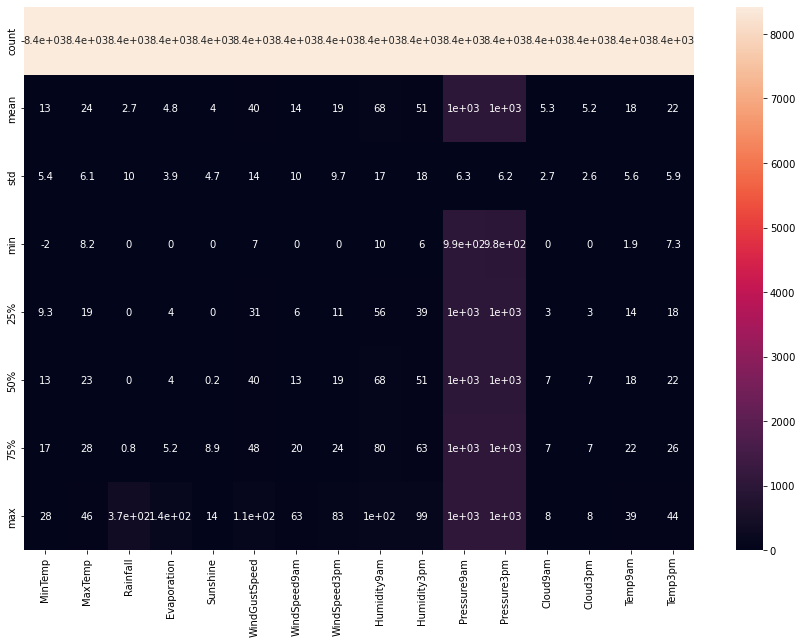

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe(),annot=True)

In [36]:
df.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          4.0       0.0   
1  2008-12-02   Albury      7.4     25.1       0.0          4.0       0.0   
2  2008-12-03   Albury     12.9     25.7       0.0          4.0       0.0   
3  2008-12-04   Albury      9.2     28.0       0.0          4.0       0.0   
4  2008-12-05   Albury     17.5     32.3       1.0          4.0       0.0   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       7.0     16.9     21.8         No   
1       1010.6       1007.8       7.0       7.0     17.2     24.3         No   
2       1007.6       1008.7       7.0       2.0     21.0     23.2         No   
3       1017.6       1012.8       7.0       7.0     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [37]:
df.sample()


Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5461  2010-02-12  Melbourne     19.5     22.8      35.2          6.8   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
5461       0.4           S           37.0         SW  ...        79.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
5461         66.0       1011.1       1012.6       8.0       7.0     20.9   

      Temp3pm  RainToday  RainTomorrow  
5461     21.1        Yes            No  

[1 rows x 23 columns]

In [38]:
# Change Date_of_Journey into day and month 
# excluding year as year is same 2019 

df['Day'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.day
df['Month'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.month
df['Year'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.year

df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          4.0       0.0   
1  2008-12-02   Albury      7.4     25.1       0.0          4.0       0.0   
2  2008-12-03   Albury     12.9     25.7       0.0          4.0       0.0   
3  2008-12-04   Albury      9.2     28.0       0.0          4.0       0.0   
4  2008-12-05   Albury     17.5     32.3       1.0          4.0       0.0   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1       8.0       7.0   
1         WNW           44.0        NNW  ...      1007.8       7.0       7.0   
2         WSW           46.0          W  ...      1008.7       7.0       2.0   
3          NE           24.0         SE  ...      1012.8       7.0       7.0   
4           W           41.0        ENE  ...      1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 26 columns]

In [39]:
df.drop('Date',axis=1,inplace=True) #seperated into day,month and year
df


Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0      Albury     13.4  22.900000       0.6          4.0       0.0   
1      Albury      7.4  25.100000       0.0          4.0       0.0   
2      Albury     12.9  25.700000       0.0          4.0       0.0   
3      Albury      9.2  28.000000       0.0          4.0       0.0   
4      Albury     17.5  32.300000       1.0          4.0       0.0   
...       ...      ...        ...       ...          ...       ...   
8420    Uluru      2.8  23.400000       0.0          4.0       0.0   
8421    Uluru      3.6  25.300000       0.0          4.0       0.0   
8422    Uluru      5.4  26.900000       0.0          4.0       0.0   
8423    Uluru      7.8  27.000000       0.0          4.0       0.0   
8424    Uluru     14.9  23.859976       0.0          4.0       0.0   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
0              W      44.000000          W        WNW  ...       1007.1   
1            WNW      44.000000        NNW        WSW  ...       1007.8   
2            WSW      46.000000          W        WSW  ...       1008.7   
3             NE      24.000000         SE          E  ...       1012.8   
4              W      41.000000        ENE         NW  ...       1006.0   
...          ...            ...        ...        ...  ...          ...   
8420           E      31.000000         SE        ENE  ...       1020.3   
8421         NNW      22.000000         SE          N  ...       1019.1   
8422           N      37.000000         SE        WNW  ...       1016.8   
8423          SE      28.000000        SSE          N  ...       1016.5   
8424           N      40.174469        ESE        ESE  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
0          8.0       7.0     16.9     21.8         No            No    1   
1          7.0       7.0     17.2     24.3         No            No    2   
2          7.0       2.0     21.0     23.2         No            No    3   
3          7.0       7.0     18.1     26.5         No            No    4   
4          7.0       8.0     17.8     29.7         No            No    5   
...        ...       ...      ...      ...        ...           ...  ...   
8420       7.0       7.0     10.1     22.4         No            No   21   
8421       7.0       7.0     10.9     24.5         No            No   22   
8422       7.0       7.0     12.5     26.1         No            No   23   
8423       3.0       2.0     15.1     26.0         No            No   24   
8424       8.0       8.0     15.0     20.9         No            No   25   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[8425 rows x 25 columns]

<AxesSubplot:title={'center':'Location Bar Chart'}, xlabel='Location', ylabel='count'>

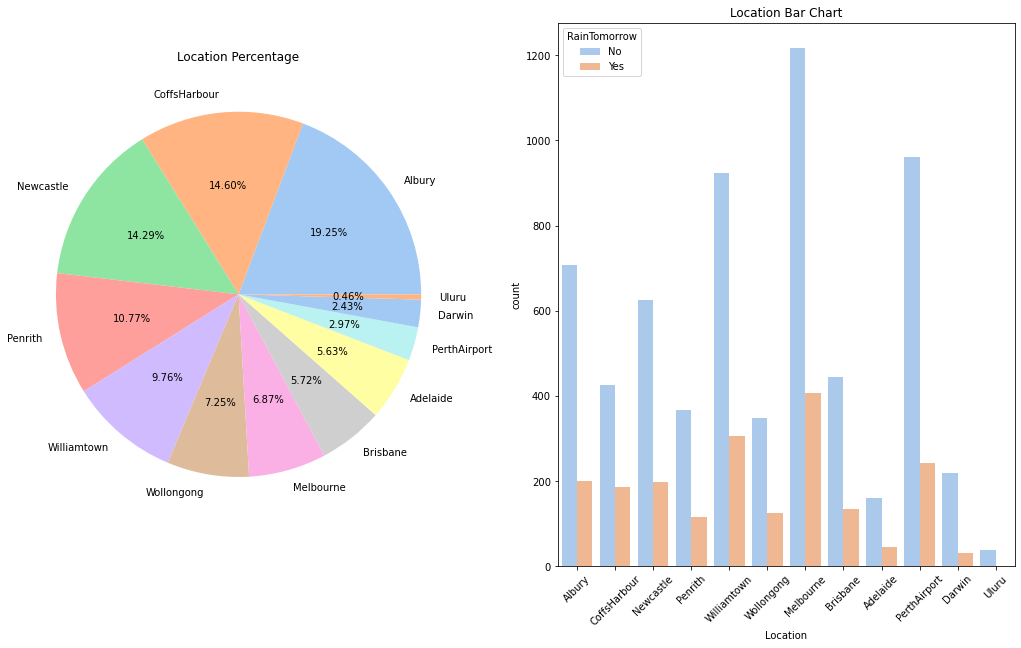

In [40]:
colors=sns.color_palette('pastel')
labels=df['Location'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Location Percentage')
plt.pie(df['Location'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('Location Bar Chart')
sns.countplot(x="Location", data=df, palette=colors,hue='RainTomorrow')


Albury HAS THE THE HIGHEST DATA FOR RAINFALL FOLLOWED BY coffsharbour AND NEWCASTLE

CHANCE OF RAINING TOMORROW OR NOT RAINING TOMORROW ARE HIGH IN MELBOURNE WHICH HAS 6.87% OF DATA.

Albury HAS THE THE HIGHEST DATA FOR RAINFALL FOLLOWED BY coffsharbour AND NEWCASTLE

CHANCE OF RAINING TOMORROW OR NOT RAINING TOMORROW ARE HIGH IN MELBOURNE WHICH HAS 6.87% OF DATA.

DARWIN HAS HIGH RAINFALL AMONGST ALL LOCATIONS AND HIGH MIN TEMP FOR RAINING TODAY AND TOMORROW.

COMPARING BOTH GRAPH FOR RAINIG TODATY AND TOMMMOROW ON BASIS OF MIN TEMP HAS NO CHANGES IN CLIMATE, AS SEEN RAINFALL GRAPH IS SAME FOR BOTH DAYS.

<AxesSubplot:xlabel='Rainfall', ylabel='Humidity9am'>

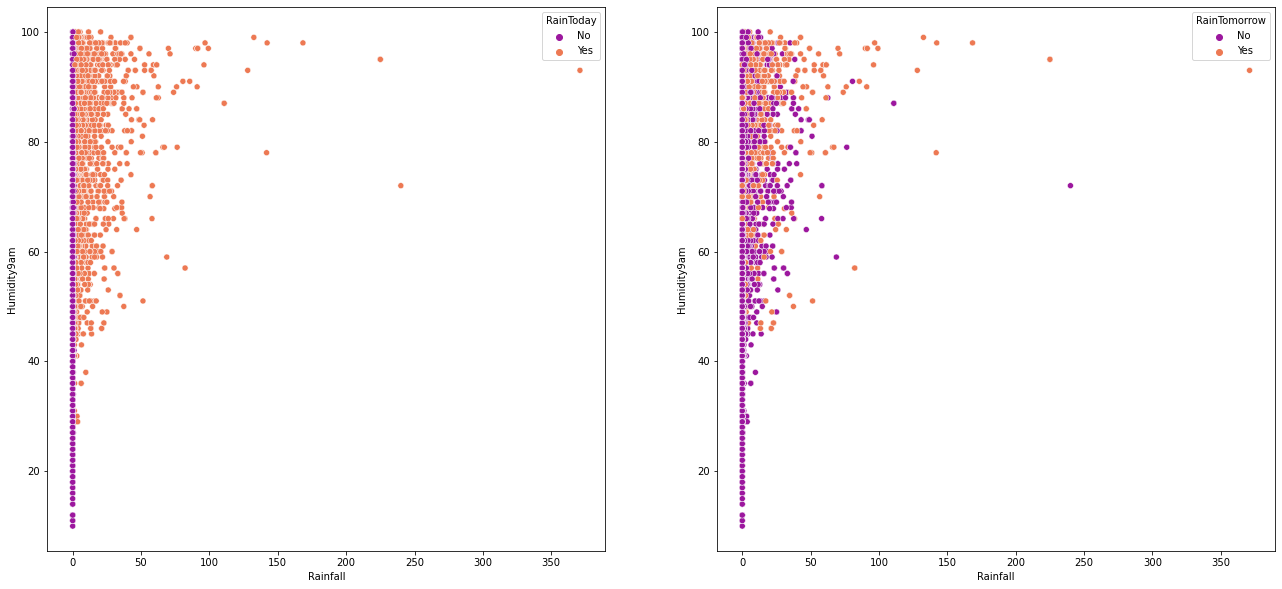

In [41]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)

sns.scatterplot(data=df,y='Humidity9am',x='Rainfall',hue='RainToday',palette='plasma')

plt.subplot(1,2,2)

sns.scatterplot(data=df,y='Humidity9am',x='Rainfall',hue='RainTomorrow',palette='plasma')

DIFFERENCE IS SEEN THAT IT HAS MORE NO RAINING SYMBOL,HENCE IT HAS LOW CHANCE OF RAINING TOMORROW.

RAINFALL MEASUREMENT IS SEEN TO BE SAME,IF RAINED.



<AxesSubplot:xlabel='Sunshine', ylabel='Cloud3pm'>

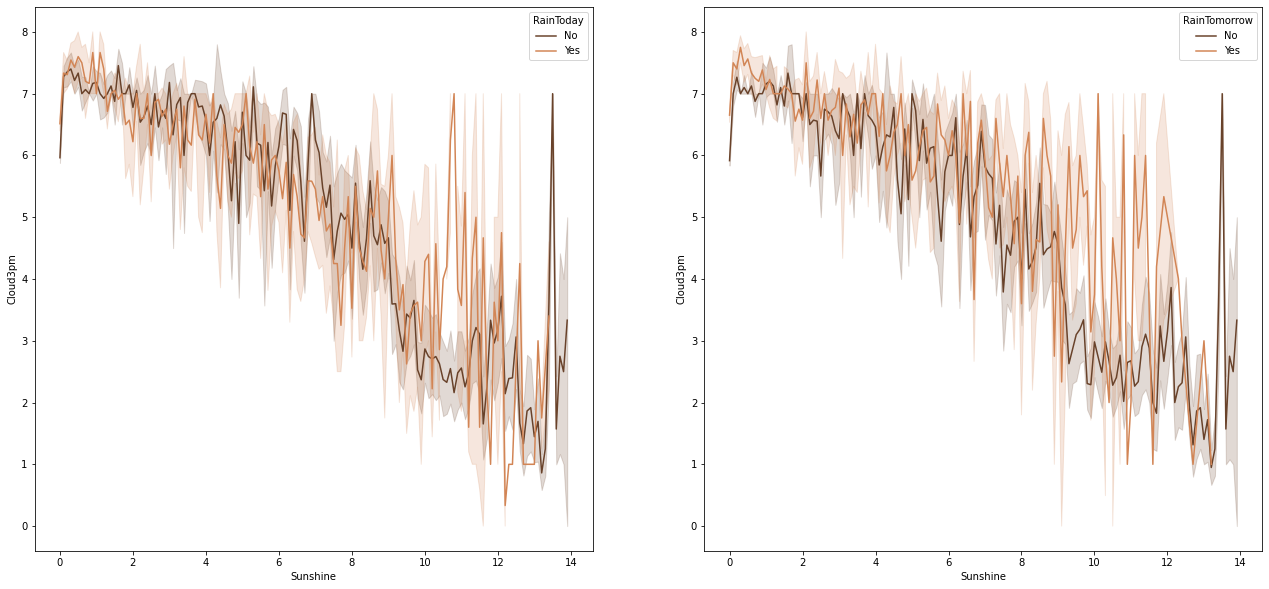

In [42]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)

sns.lineplot(data=df,y='Cloud3pm',x='Sunshine',hue='RainToday',palette='copper')

plt.subplot(1,2,2)
sns.lineplot(data=df,y='Cloud3pm',x='Sunshine',hue='RainTomorrow',palette='copper')

AS SUNSHINE INCREASES CLOUDS AT 3PM DECREASES AND CHANCES O RAINING GETS LOW.

FROM GRAPH IT IS ALSO SEEN THAT IT WILL RAIN LESS THE NEXT DAY COMPARED TO RAINTODAY



# Label Encoding


In [43]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
Month              int64
Year               int64
dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Location'] = LE.fit_transform(df['Location'])
df['WindGustDir'] = LE.fit_transform(df['WindGustDir'])
df['WindDir9am'] = LE.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = LE.fit_transform(df['WindDir3pm'])
df['RainToday'] = LE.fit_transform(df['RainToday'])
df['RainTomorrow'] = LE.fit_transform(df['RainTomorrow'])


# Correlation

In [45]:
df.corr()


Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116531  0.064268  0.005801     0.120376 -0.093480   
MinTemp        0.116531  1.000000  0.717522  0.085723     0.267110  0.135377   
MaxTemp        0.064268  0.717522  1.000000 -0.087710     0.327657  0.286542   
Rainfall       0.005801  0.085723 -0.087710  1.000000     0.016758 -0.087678   
Evaporation    0.120376  0.267110  0.327657  0.016758     1.000000  0.205342   
Sunshine      -0.093480  0.135377  0.286542 -0.087678     0.205342  1.000000   
WindGustDir   -0.035408 -0.145316 -0.224670  0.037106    -0.069158 -0.055204   
WindGustSpeed  0.231396  0.230058  0.139998  0.083374     0.154519  0.074984   
WindDir9am    -0.027103 -0.041650 -0.214119  0.093072    -0.049889 -0.013584   
WindDir3pm    -0.027736 -0.147166 -0.180622  0.038153    -0.048284 -0.062728   
WindSpeed9am   0.221378  0.136872  0.013314  0.048812     0.155717  0.210528   
WindSpeed3pm   0.231801  0.178349  0.088172  0.021654     0.136162  0.167089   
Humidity9am    0.005662 -0.130731 -0.390976  0.227595    -0.250073 -0.379718   
Humidity3pm    0.055790  0.079048 -0.421879  0.234938    -0.174852 -0.312689   
Pressure9am   -0.032261 -0.429432 -0.325721 -0.069604    -0.176155 -0.001555   
Pressure3pm   -0.020574 -0.422991 -0.403258 -0.031268    -0.188242 -0.033321   
Cloud9am       0.033864  0.017254 -0.242183  0.133553    -0.105066 -0.574466   
Cloud3pm       0.008465 -0.038395 -0.242127  0.101161    -0.133774 -0.545069   
Temp9am        0.118051  0.887119  0.866039 -0.007351     0.322802  0.264455   
Temp3pm        0.060570  0.685520  0.974506 -0.090768     0.318246  0.284559   
RainToday      0.003071  0.064789 -0.224883  0.464941    -0.090804 -0.144715   
RainTomorrow   0.002824  0.092942 -0.152886  0.219015    -0.060386 -0.197937   
Day           -0.002019  0.009446  0.015608 -0.013029     0.016783  0.007805   
Month         -0.082407 -0.245854 -0.163253 -0.016258     0.018540  0.019281   
Year           0.486405  0.044123  0.119772  0.004491     0.109725 -0.265601   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.035408       0.231396   -0.027103   -0.027736  ...   
MinTemp          -0.145316       0.230058   -0.041650   -0.147166  ...   
MaxTemp          -0.224670       0.139998   -0.214119   -0.180622  ...   
Rainfall          0.037106       0.083374    0.093072    0.038153  ...   
Evaporation      -0.069158       0.154519   -0.049889   -0.048284  ...   
Sunshine         -0.055204       0.074984   -0.013584   -0.062728  ...   
WindGustDir       1.000000       0.016591    0.403562    0.505799  ...   
WindGustSpeed     0.016591       1.000000   -0.072058    0.071235  ...   
WindDir9am        0.403562      -0.072058    1.000000    0.249527  ...   
WindDir3pm        0.505799       0.071235    0.249527    1.000000  ...   
WindSpeed9am      0.025399       0.600198    0.054272    0.025973  ...   
WindSpeed3pm      0.094623       0.634939    0.047116    0.068799  ...   
Humidity9am       0.036467      -0.269593    0.025604   -0.010312  ...   
Humidity3pm       0.053567      -0.091860    0.124556   -0.012167  ...   
Pressure9am      -0.109704      -0.407139   -0.011024   -0.136517  ...   
Pressure3pm      -0.024997      -0.372651    0.073446   -0.043681  ...   
Cloud9am          0.164227      -0.007313    0.098501    0.087079  ...   
Cloud3pm          0.127633       0.029561    0.066539    0.062069  ...   
Temp9am          -0.176318       0.202298   -0.103111   -0.165072  ...   
Temp3pm          -0.238856       0.102199   -0.221634   -0.194463  ...   
RainToday         0.125188       0.076822    0.157324    0.100125  ...   
RainTomorrow      0.051832       0.190127    0.032860    0.008918  ...   
Day               0.015683      -0.002876   -0.015154    0.003089  ...   
Month             0.034823       0.051968    0.012544    0.029384  ...   
Year             -0.088340      -0.042402   -0.014498   -0.005812  ...   

         

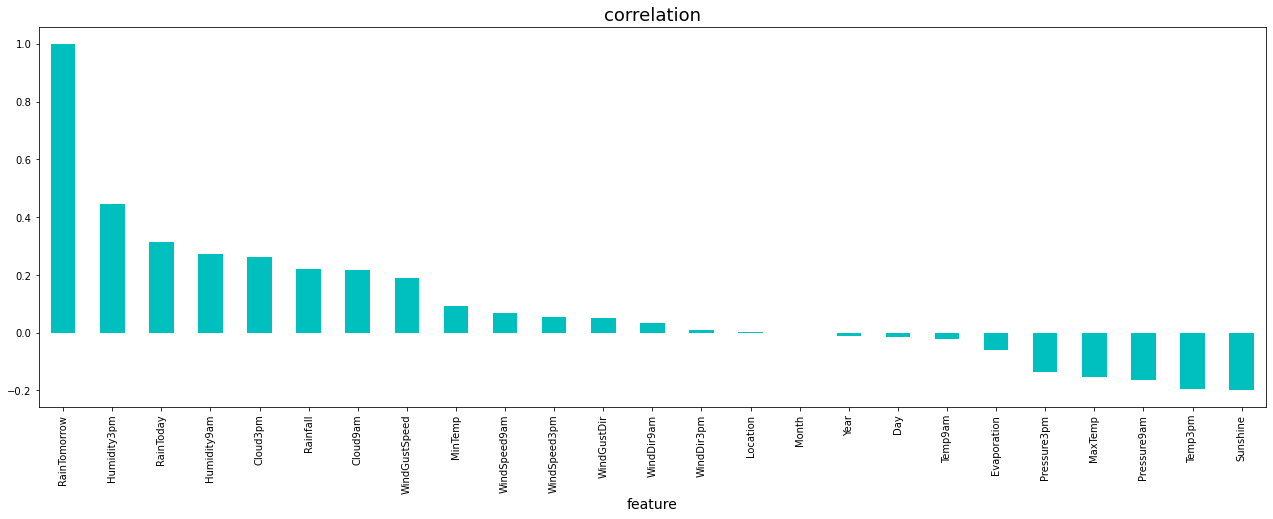

In [46]:
plt.figure(figsize=(22,7))
df.corr()['RainTomorrow'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


<AxesSubplot:>

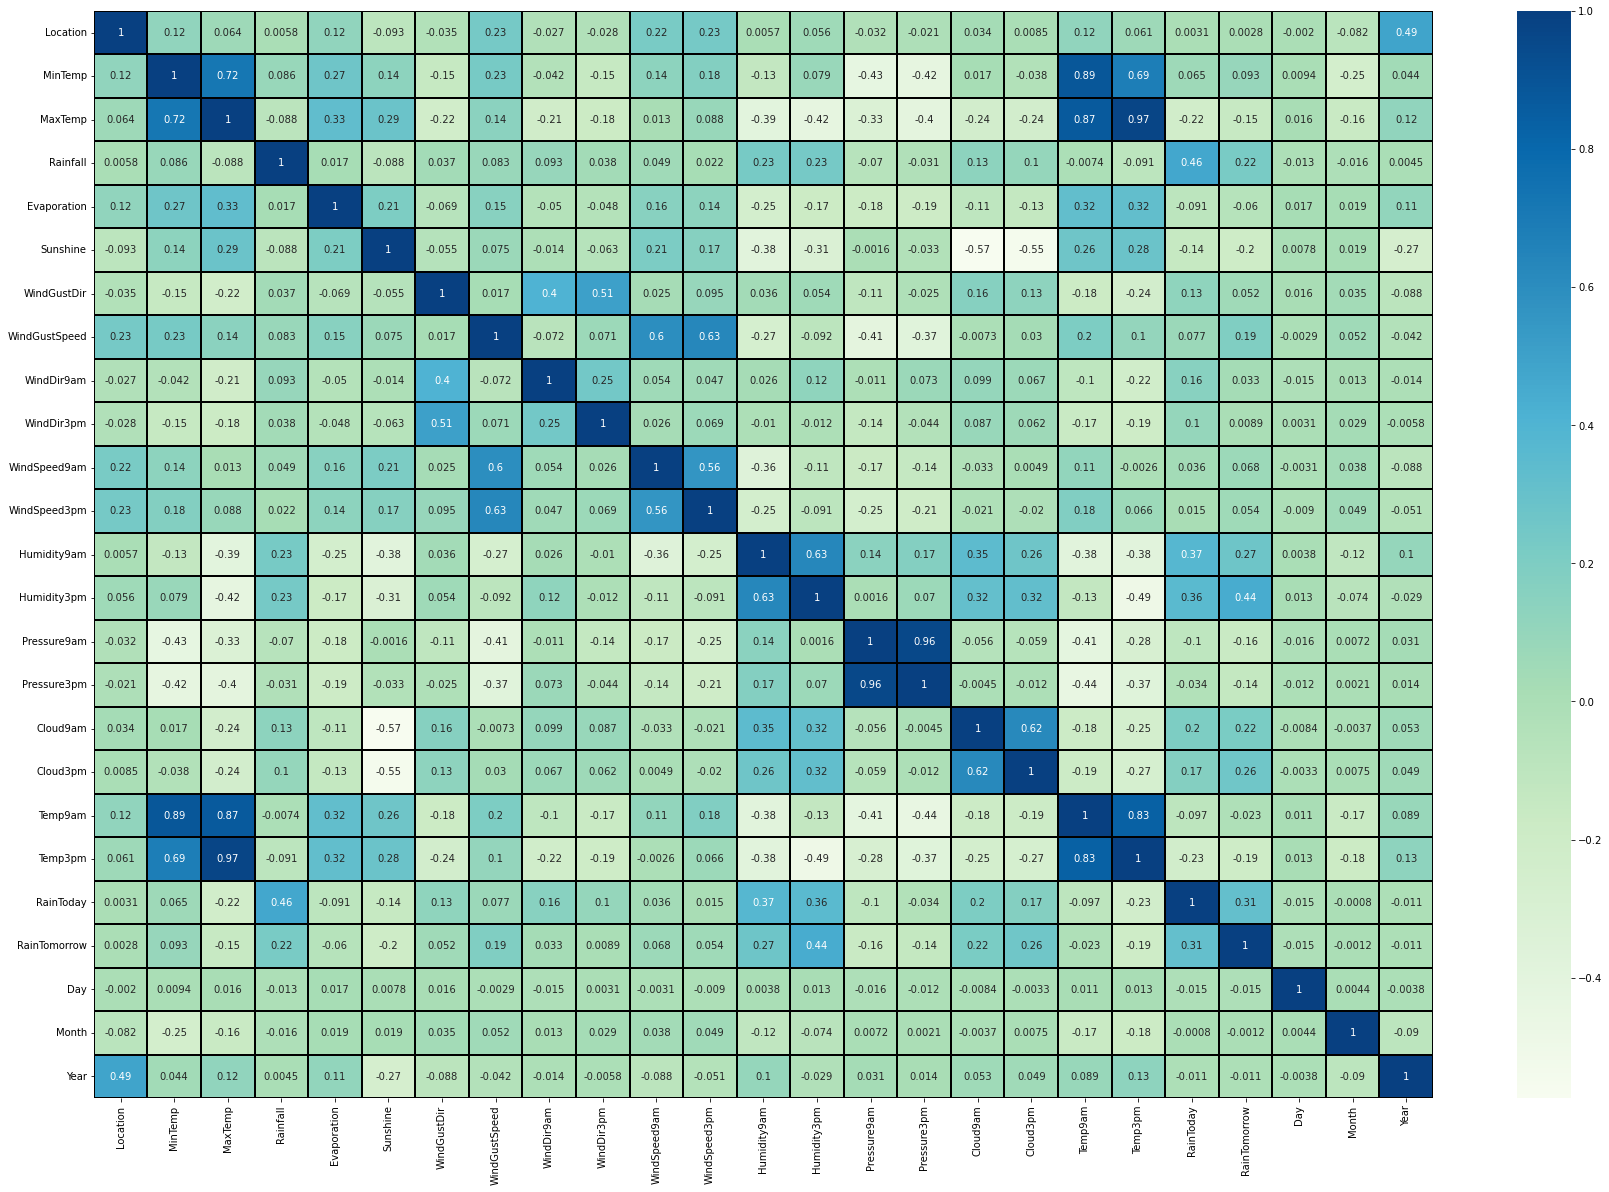

In [47]:
plt.figure(figsize=(30,20))

sns.heatmap(df.corr(),cmap='GnBu',annot=True,linecolor='black',linewidths=0.2)

TEMP 3PM IS CORRELATED TO TEMP 9AM.

PRESSURE 3PM IS CORRELATED WITH 9AM.

HUMIDTY ,WINDSPEED,MAX MIN TEMP ARE CORRELATED.

MULTICOLLINEARITY MAY BE PRESENT WE WILL CHECK FUTHER.



# CHECKING OUTLIERS

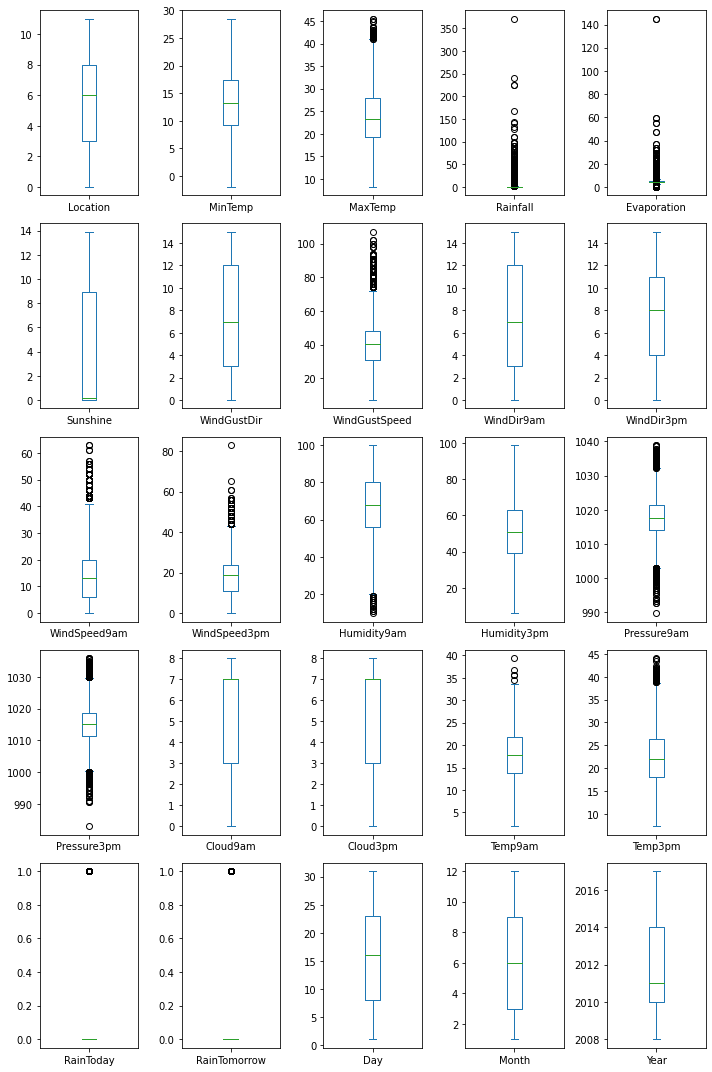

In [48]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,15))
plt.tight_layout()

# OUTLIERS PRESENT IN DATA

'MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm'



# REMOVING OUTLIERS BY ZSCORE


In [49]:
from scipy.stats import zscore


In [50]:
var=df[['MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
               'Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]


In [51]:
z=np.abs(zscore(var))
z


MaxTemp  Rainfall  Evaporation  WindGustSpeed  WindSpeed9am  \
0     1.570089e-01  0.206021       0.2071       0.277710      0.607461   
1     2.028121e-01  0.264165       0.2071       0.277710      0.972321   
2     3.009450e-01  0.264165       0.2071       0.422897      0.508725   
3     6.771214e-01  0.264165       0.2071       1.174166      0.281166   
4     1.380408e+00  0.167258       0.2071       0.059928      0.676112   
...            ...       ...          ...            ...           ...   
8420  7.523137e-02  0.264165       0.2071       0.666009      0.083694   
8421  2.355231e-01  0.264165       0.2071       1.319354      0.083694   
8422  4.972110e-01  0.264165       0.2071       0.230447      0.478639   
8423  5.135665e-01  0.264165       0.2071       0.883791      0.083694   
8424  2.905320e-15  0.264165       0.2071       0.000000      0.311252   

      WindSpeed3pm  Humidity9am  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0         0.563297     0.189439     1.584003     1.308665  0.153712  0.108138  
1         0.357200     1.420268     1.121880     1.196072  0.100217  0.312348  
2         0.769394     1.777981     1.599939     1.051309  0.577390  0.127334  
3         0.982428     1.360650     0.006411     0.391836  0.060269  0.682376  
4         0.151104     0.845246     1.090010     1.485596  0.006773  1.220599  
...            ...          ...          ...          ...       ...       ...  
8420      0.776331     1.002937     1.109058     0.814518  1.366273  0.007221  
8421      0.982428     0.704843     0.933770     0.621501  1.223619  0.345987  
8422      0.982428     0.883699     0.535388     0.251553  0.938310  0.615099  
8423      1.188525     1.002937     0.280424     0.203299  0.474684  0.598279  
8424      0.158041     0.347130     0.407906     0.428485  0.492516  0.259513  

[8425 rows x 11 columns]

In [52]:
threshold=3
print(np.where(z>3))


(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
        683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
       2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
       3059, 3060, 3066, 3067, 3067, 3067, 3068, 3

In [53]:
df1=df[(z<3).all(axis=1)]
df1


Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000       0.6          4.0       0.0   
1            1      7.4  25.100000       0.0          4.0       0.0   
2            1     12.9  25.700000       0.0          4.0       0.0   
3            1      9.2  28.000000       0.0          4.0       0.0   
4            1     17.5  32.300000       1.0          4.0       0.0   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000       0.0          4.0       0.0   
8421         9      3.6  25.300000       0.0          4.0       0.0   
8422         9      5.4  26.900000       0.0          4.0       0.0   
8423         9      7.8  27.000000       0.0          4.0       0.0   
8424         9     14.9  23.859976       0.0          4.0       0.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13      44.000000          13          14  ...       1007.1   
1              14      44.000000           6          15  ...       1007.8   
2              15      46.000000          13          15  ...       1008.7   
3               4      24.000000           9           0  ...       1012.8   
4              13      41.000000           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420            0      31.000000           9           1  ...       1020.3   
8421            6      22.000000           9           3  ...       1019.1   
8422            3      37.000000           9          14  ...       1016.8   
8423            9      28.000000          10           3  ...       1016.5   
8424            3      40.174469           2           2  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
0          8.0       7.0     16.9     21.8          0             0    1   
1          7.0       7.0     17.2     24.3          0             0    2   
2          7.0       2.0     21.0     23.2          0             0    3   
3          7.0       7.0     18.1     26.5          0             0    4   
4          7.0       8.0     17.8     29.7          0             0    5   
...        ...       ...      ...      ...        ...           ...  ...   
8420       7.0       7.0     10.1     22.4          0             0   21   
8421       7.0       7.0     10.9     24.5          0             0   22   
8422       7.0       7.0     12.5     26.1          0             0   23   
8423       3.0       2.0     15.1     26.0          0             0   24   
8424       8.0       8.0     15.0     20.9          0             0   25   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[7985 rows x 25 columns]

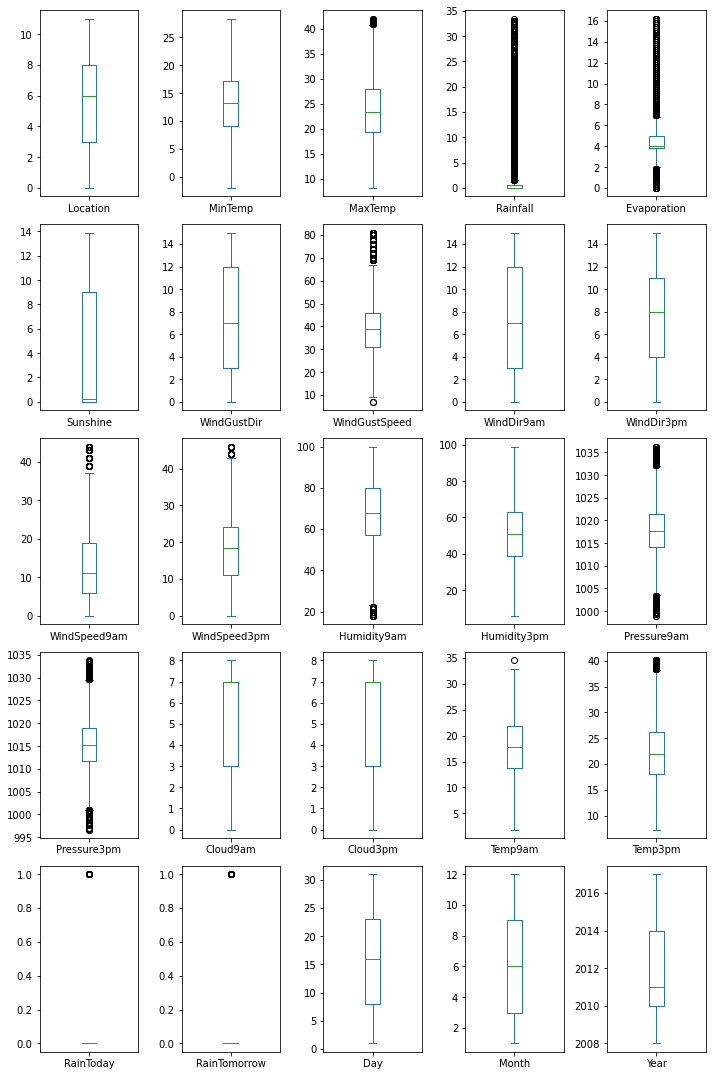

In [54]:
df1.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,15))
plt.tight_layout()


outliers are not completely removed ,have to check with IQR method but before removing more checking data loss.



Percenrtage loss

In [55]:
loss_percent=(8425-7985)/7985*100
print(loss_percent,'%') 


5.510331872260489 %


In [56]:
from scipy import stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df2 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df2.shape


(3816, 25)

Too much of data loss ,will have to go with zscore only

# SELECTING FEATURE AND LABEL

In [57]:
#independent column
x=df1.drop(['RainTomorrow'],axis=1)
#target
y=df1['RainTomorrow']


# CHECKING SKEWNESS


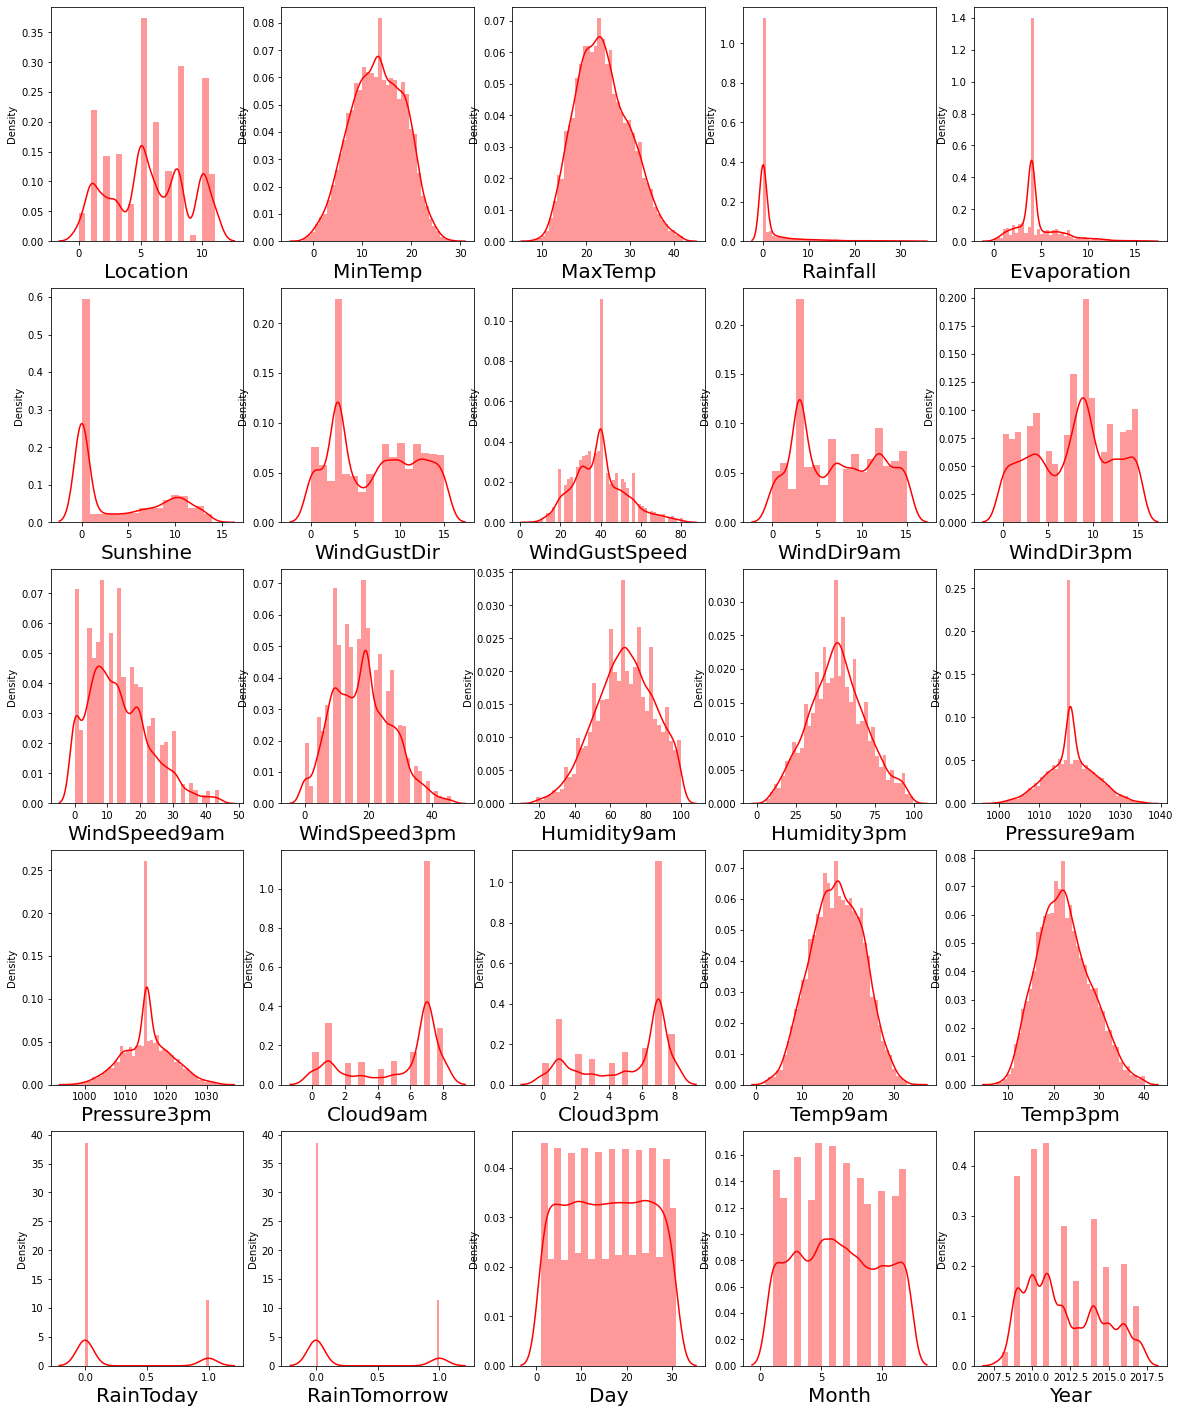

In [58]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df1[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


evaporation,rainfall,sunshine,cloud 9am and 3pm are having some skewness and hence removing them



In [59]:
from sklearn.preprocessing import power_transform

df1['Evaporation']=power_transform(df1,method='yeo-johnson')
df1['Rainfall']=power_transform(df1,method='yeo-johnson')
df1['Sunshine']=power_transform(df1,method='yeo-johnson')
df1['Cloud9am']=power_transform(df1,method='yeo-johnson')
df1['Cloud3pm']=power_transform(df1,method='yeo-johnson')
df1.head()


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9 -1.568315    -1.568315 -1.568315           13   
1         1      7.4     25.1 -1.568315    -1.568315 -1.568315           14   
2         1     12.9     25.7 -1.568315    -1.568315 -1.568315           15   
3         1      9.2     28.0 -1.568315    -1.568315 -1.568315            4   
4         1     17.5     32.3 -1.568315    -1.568315 -1.568315           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1 -1.568315   
1           44.0           6          15  ...       1007.8 -1.568315   
2           46.0          13          15  ...       1008.7 -1.568315   
3           24.0           9           0  ...       1012.8 -1.568315   
4           41.0           1           7  ...       1006.0 -1.568315   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0 -1.568315     16.9     21.8          0             0    1     12  2008  
1 -1.568315     17.2     24.3          0             0    2     12  2008  
2 -1.568315     21.0     23.2          0             0    3     12  2008  
3 -1.568315     18.1     26.5          0             0    4     12  2008  
4 -1.568315     17.8     29.7          0             0    5     12  2008  

[5 rows x 25 columns]

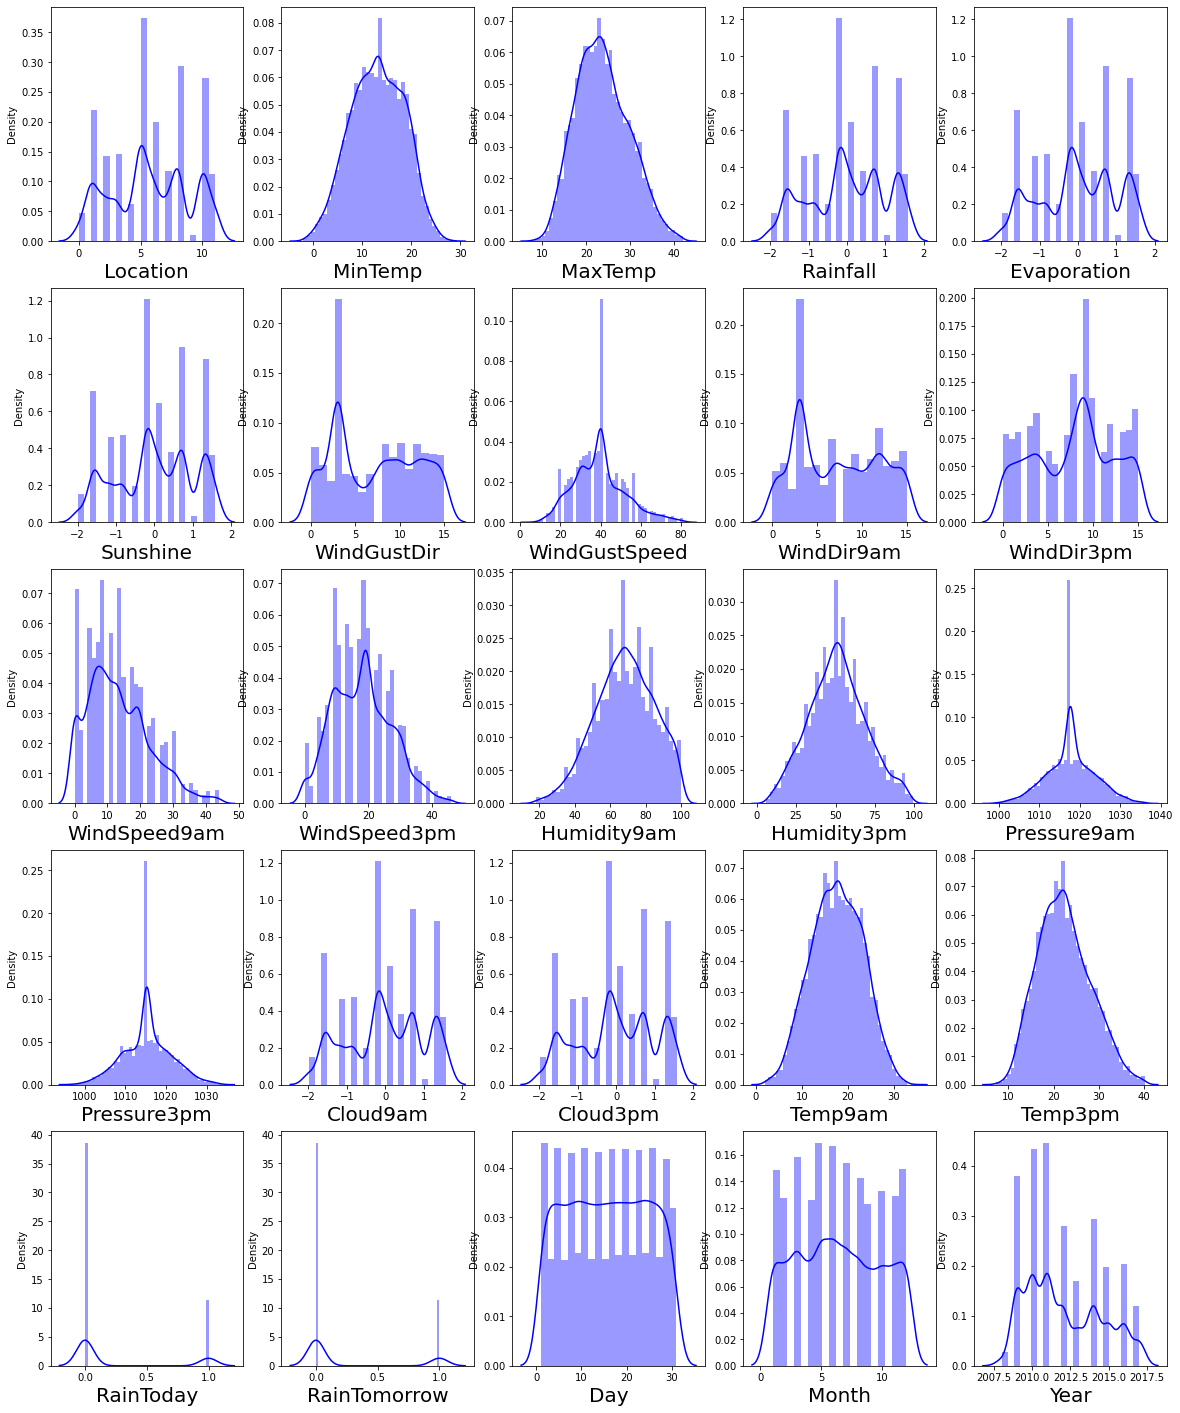

In [60]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Skewness Removed



# Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0 -1.508244  0.056720 -0.145362 -0.264473    -0.233788 -0.848811     1.229051   
1 -1.508244 -1.058229  0.221115 -0.390682    -0.233788 -0.848811     1.441765   
2 -1.508244 -0.036193  0.321064 -0.390682    -0.233788 -0.848811     1.654478   
3 -1.508244 -0.723744  0.704199 -0.390682    -0.233788 -0.848811    -0.685372   
4 -1.508244  0.818601  1.420496 -0.180335    -0.233788 -0.848811     1.229051   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  Pressure3pm  \
0       0.364051    1.249991    1.400119  ...    -1.687192    -1.398140   
1       0.364051   -0.278086    1.626475  ...    -1.202518    -1.280023   
2       0.520459    1.249991    1.626475  ...    -1.703905    -1.128157   
3      -1.200030    0.376804   -1.768865  ...    -0.032616    -0.436325   
4       0.129439   -1.369569   -0.184373  ...    -1.169093    -1.583754   

   Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday       Day     Month  \
0  1.032477  0.700800 -0.137764 -0.098234  -0.542563 -1.671471  1.634864   
1  0.658618  0.700800 -0.083912  0.330173  -0.542563 -1.557781  1.634864   
2  0.658618 -1.244514  0.598213  0.141674  -0.542563 -1.444092  1.634864   
3  0.658618  0.700800  0.077644  0.707171  -0.542563 -1.330402  1.634864   
4  0.658618  1.089863  0.023792  1.255531  -0.542563 -1.216713  1.634864   

       Year  
0 -1.661238  
1 -1.661238  
2 -1.661238  
3 -1.661238  
4 -1.661238  

[5 rows x 24 columns]

In [62]:
 #Checking Variance Inflation Factor(VIF)
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


VIF values       Features
0     1.563540       Location
1     8.624231        MinTemp
2    26.452974        MaxTemp
3     1.990037       Rainfall
4     1.560649    Evaporation
5     2.213868       Sunshine
6     1.634504    WindGustDir
7     2.340825  WindGustSpeed
8     1.350195     WindDir9am
9     1.486899     WindDir3pm
10    2.087364   WindSpeed9am
11    1.979821   WindSpeed3pm
12    3.953027    Humidity9am
13    5.367522    Humidity3pm
14   19.922248    Pressure9am
15   19.045238    Pressure3pm
16    2.123684       Cloud9am
17    1.885006       Cloud3pm
18   18.002047        Temp9am
19   33.377173        Temp3pm
20    2.188177      RainToday
21    1.004418            Day
22    1.152506          Month
23    1.643690           Year

By checking VIF value we can find the features which causing multicollinearity problem.

Here Temp 3pm is having higher VIF above 10, which means they have high correlation with the other features.

We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).



In [63]:
# Dropping column
x.drop("Temp3pm",axis=1,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


VIF values       Features
0     1.562890       Location
1     8.582134        MinTemp
2     9.508664        MaxTemp
3     1.988384       Rainfall
4     1.560427    Evaporation
5     2.198190       Sunshine
6     1.631849    WindGustDir
7     2.324338  WindGustSpeed
8     1.349426     WindDir9am
9     1.485803     WindDir3pm
10    2.085897   WindSpeed9am
11    1.978358   WindSpeed3pm
12    3.500862    Humidity9am
13    3.556917    Humidity3pm
14   19.330838    Pressure9am
15   18.542973    Pressure3pm
16    2.122764       Cloud9am
17    1.877672       Cloud3pm
18   16.636776        Temp9am
19    2.185915      RainToday
20    1.003935            Day
21    1.138183          Month
22    1.643543           Year

pressure 9am is showing high VIF above 10,so dropping it and again checking vif

In [64]:
x.drop("Pressure9am",axis=1,inplace=True)


In [65]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.562887       Location
1     8.463774        MinTemp
2     9.108030        MaxTemp
3     1.986220       Rainfall
4     1.550804    Evaporation
5     2.191736       Sunshine
6     1.619209    WindGustDir
7     2.306774  WindGustSpeed
8     1.328620     WindDir9am
9     1.413100     WindDir3pm
10    2.085758   WindSpeed9am
11    1.967831   WindSpeed3pm
12    3.499907    Humidity9am
13    3.554436    Humidity3pm
14    1.463061    Pressure3pm
15    2.122662       Cloud9am
16    1.873980       Cloud3pm
17   16.567376        Temp9am
18    2.179517      RainToday
19    1.003265            Day
20    1.137465          Month
21    1.640479           Year

In [66]:
x.drop("Temp9am",axis=1,inplace=True)


In [67]:
vif=pd.DataFrame()
vif["VALUES"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif["FEATURES"]=x.columns
vif


VALUES       FEATURES
0   1.560465       Location
1   4.336770        MinTemp
2   5.300542        MaxTemp
3   1.984171       Rainfall
4   1.549600    Evaporation
5   2.189957       Sunshine
6   1.615375    WindGustDir
7   2.269309  WindGustSpeed
8   1.328607     WindDir9am
9   1.412190     WindDir3pm
10  2.053099   WindSpeed9am
11  1.918359   WindSpeed3pm
12  2.450898    Humidity9am
13  2.826556    Humidity3pm
14  1.459130    Pressure3pm
15  2.091103       Cloud9am
16  1.863637       Cloud3pm
17  2.178937      RainToday
18  1.003064            Day
19  1.124826          Month
20  1.607902           Year

Finally there are no VIF above 10 which means data is free from multicolinearity , so we can move forward for model building



# OVERSAMPLING

In [68]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x,y=sm.fit_resample(x,y)


In [69]:
y.value_counts()


0    6163
1    6163
Name: RainTomorrow, dtype: int64

We have used oversampling method to balance the data and checked the value count.

As the data was not balanced so need to first use this method and now the target column is balanced and we can move forward for model building

# Splitting the dataset and Model Selection

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=140)

# 1) LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)

print('Accuracy Score is''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))


Accuracy Score is
 0.7691740412979351
Confusion Matrix
 [[1062  298]
 [ 328 1024]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1360
           1       0.77      0.76      0.77      1352

    accuracy                           0.77      2712
   macro avg       0.77      0.77      0.77      2712
weighted avg       0.77      0.77      0.77      2712



Cross Validation



In [72]:
test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 64.97647249716047 and Accuracy score is 76.91740412979351
At cross fold 3 the Cross Val score is 67.3138456293525 and Accuracy score is 76.91740412979351
At cross fold 4 the Cross Val score is 67.40346518961015 and Accuracy score is 76.91740412979351
At cross fold 5 the Cross Val score is 68.93582992388161 and Accuracy score is 76.91740412979351
At cross fold 6 the Cross Val score is 68.42533035455514 and Accuracy score is 76.91740412979351
At cross fold 7 the Cross Val score is 71.25686777731069 and Accuracy score is 76.91740412979351
At cross fold 8 the Cross Val score is 71.85792346848478 and Accuracy score is 76.91740412979351
At cross fold 9 the Cross Val score is 72.4746782687205 and Accuracy score is 76.91740412979351


# 2) DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)

print('Accuracy score''\n',accuracy_score(y_test,pred_dt))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_dt))
print('Classification Report''\n',classification_report(y_test,pred_dt))


Accuracy score
 0.8838495575221239
Confusion Matrix
 [[1203  157]
 [ 158 1194]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1360
           1       0.88      0.88      0.88      1352

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



In [74]:
#Cross Validation
test_accuracy= accuracy_score(y_test,pred_dt)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 53.96722375466494 and Accuracy score is 88.38495575221239
At cross fold 3 the Cross Val score is 61.66674723647532 and Accuracy score is 88.38495575221239
At cross fold 4 the Cross Val score is 64.22265603526334 and Accuracy score is 88.38495575221239
At cross fold 5 the Cross Val score is 71.41060327142854 and Accuracy score is 88.38495575221239
At cross fold 6 the Cross Val score is 69.5056823431581 and Accuracy score is 88.38495575221239
At cross fold 7 the Cross Val score is 79.10962263176914 and Accuracy score is 88.38495575221239
At cross fold 8 the Cross Val score is 79.69400772815763 and Accuracy score is 88.38495575221239
At cross fold 9 the Cross Val score is 81.29274273286899 and Accuracy score is 88.38495575221239


# 3) RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))


Accuracy score
 0.9472713864306784
Confusion Matrix
 [[1278   82]
 [  61 1291]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1360
           1       0.94      0.95      0.95      1352

    accuracy                           0.95      2712
   macro avg       0.95      0.95      0.95      2712
weighted avg       0.95      0.95      0.95      2712



In [76]:
#Cross Validation
test_accuracy= accuracy_score(y_test,pred_rfc)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(rfc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 56.69316891124453 and Accuracy score is 94.72713864306785
At cross fold 3 the Cross Val score is 67.28892230692848 and Accuracy score is 94.72713864306785
At cross fold 4 the Cross Val score is 69.00969676405239 and Accuracy score is 94.72713864306785
At cross fold 5 the Cross Val score is 77.83662598355896 and Accuracy score is 94.72713864306785
At cross fold 6 the Cross Val score is 74.18681803787597 and Accuracy score is 94.72713864306785
At cross fold 7 the Cross Val score is 82.84184937719861 and Accuracy score is 94.72713864306785
At cross fold 8 the Cross Val score is 84.29446851007526 and Accuracy score is 94.72713864306785
At cross fold 9 the Cross Val score is 86.36390187780995 and Accuracy score is 94.72713864306785
At cross fold 10 the Cross Val score is 87.28856605681422 and Accuracy score is 94.72713864306785


# 4) SUPPORT VECTOR CLASSIFIER

In [77]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

print('Accuracy score''\n',accuracy_score(y_test,pred_svc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_svc))
print('Classification Report''\n',classification_report(y_test,pred_svc))

Accuracy score
 0.8602507374631269
Confusion Matrix
 [[1145  215]
 [ 164 1188]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1360
           1       0.85      0.88      0.86      1352

    accuracy                           0.86      2712
   macro avg       0.86      0.86      0.86      2712
weighted avg       0.86      0.86      0.86      2712



In [78]:
#Cross Validation

test_accuracy= accuracy_score(y_test,pred_svc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 58.17783546973876 and Accuracy score is 86.02507374631269
At cross fold 3 the Cross Val score is 66.112806499993 and Accuracy score is 86.02507374631269
At cross fold 4 the Cross Val score is 67.36261750390337 and Accuracy score is 86.02507374631269
At cross fold 5 the Cross Val score is 70.52607058428705 and Accuracy score is 86.02507374631269
At cross fold 6 the Cross Val score is 69.43220792061226 and Accuracy score is 86.02507374631269
At cross fold 7 the Cross Val score is 74.72883341814347 and Accuracy score is 86.02507374631269
At cross fold 8 the Cross Val score is 75.29756988631095 and Accuracy score is 86.02507374631269
At cross fold 9 the Cross Val score is 76.32015128168216 and Accuracy score is 86.02507374631269


# 5) GradientBoostingClassifier

In [79]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
pred_gbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(pred_gbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_gbk))
print('Classification Report''\n',classification_report(y_test,pred_gbk))


Accuracy score
 0.8676253687315634
Confusion Matrix
 [[1198  162]
 [ 197 1155]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1360
           1       0.88      0.85      0.87      1352

    accuracy                           0.87      2712
   macro avg       0.87      0.87      0.87      2712
weighted avg       0.87      0.87      0.87      2712



In [80]:
#Cross Validation

test_accuracy= accuracy_score(y_test,pred_gbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 52.72594515657959 and Accuracy score is 86.76253687315634
At cross fold 3 the Cross Val score is 58.9326759468868 and Accuracy score is 86.76253687315634
At cross fold 4 the Cross Val score is 62.78641033434074 and Accuracy score is 86.76253687315634
At cross fold 5 the Cross Val score is 66.06384599313338 and Accuracy score is 86.76253687315634
At cross fold 6 the Cross Val score is 65.1489783943817 and Accuracy score is 86.76253687315634
At cross fold 7 the Cross Val score is 73.90976109353453 and Accuracy score is 86.76253687315634
At cross fold 8 the Cross Val score is 74.17843553266978 and Accuracy score is 86.76253687315634
At cross fold 9 the Cross Val score is 74.76304475712642 and Accuracy score is 86.76253687315634


# 6) ExtraTreesClassifier


In [81]:
from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))


Accuracy score
 0.9520648967551623
Confusion Matrix
 [[1277   83]
 [  47 1305]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1360
           1       0.94      0.97      0.95      1352

    accuracy                           0.95      2712
   macro avg       0.95      0.95      0.95      2712
weighted avg       0.95      0.95      0.95      2712



In [82]:
#Cross Validation

test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(ETC,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 58.753853642706474 and Accuracy score is 95.20648967551622
At cross fold 3 the Cross Val score is 68.56280997160388 and Accuracy score is 95.20648967551622
At cross fold 4 the Cross Val score is 68.20635192438806 and Accuracy score is 95.20648967551622
At cross fold 5 the Cross Val score is 77.98231526858584 and Accuracy score is 95.20648967551622
At cross fold 6 the Cross Val score is 75.5420318078546 and Accuracy score is 95.20648967551622
At cross fold 7 the Cross Val score is 82.85788955507866 and Accuracy score is 95.20648967551622
At cross fold 8 the Cross Val score is 84.14047422402386 and Accuracy score is 95.20648967551622
At cross fold 9 the Cross Val score is 85.97467264068172 and Accuracy score is 95.20648967551622
At cross fold 10 the Cross Val score is 87.82372078448721 and Accuracy score is 95.20648967551622


# 7)KNeighborsClassifier

In [83]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_knc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_knc))
print('Classification Report''\n',classification_report(y_test,pred_knc))


Accuracy score
 0.8635693215339233
Confusion Matrix
 [[1030  330]
 [  40 1312]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      1360
           1       0.80      0.97      0.88      1352

    accuracy                           0.86      2712
   macro avg       0.88      0.86      0.86      2712
weighted avg       0.88      0.86      0.86      2712



In [84]:
#CROSS VALIDATION

test_accuracy= accuracy_score(y_test,pred_knc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 60.838877170209315 and Accuracy score is 86.35693215339234
At cross fold 3 the Cross Val score is 67.01323730360022 and Accuracy score is 86.35693215339234
At cross fold 4 the Cross Val score is 66.68092583945351 and Accuracy score is 86.35693215339234
At cross fold 5 the Cross Val score is 70.96414523523983 and Accuracy score is 86.35693215339234
At cross fold 6 the Cross Val score is 69.87008515420231 and Accuracy score is 86.35693215339234
At cross fold 7 the Cross Val score is 74.3717089979867 and Accuracy score is 86.35693215339234
At cross fold 8 the Cross Val score is 75.27285579443269 and Accuracy score is 86.35693215339234
At cross fold 9 the Cross Val score is 76.33589794173736 and Accuracy score is 86.35693215339234


HENCE ALL MODELS ARE SHOWING VERY GOOD RESULTS RandomForestClassifier and ExtraTreesClassifier are SHOWING HIGHEST ACCURACY SCORE and least difference betweem accuaracy score and cv score PERFORMING RandomForestClassifier and ExtraTreesClassifier



# RANDOM FOREST CLASSIFIER IS THE BEST

# 2)RAINFALL


In [85]:
df_rainfall=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df_rainfall

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [86]:
df_rainfall.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [87]:
df_rainfall.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [88]:
df_rainfall.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

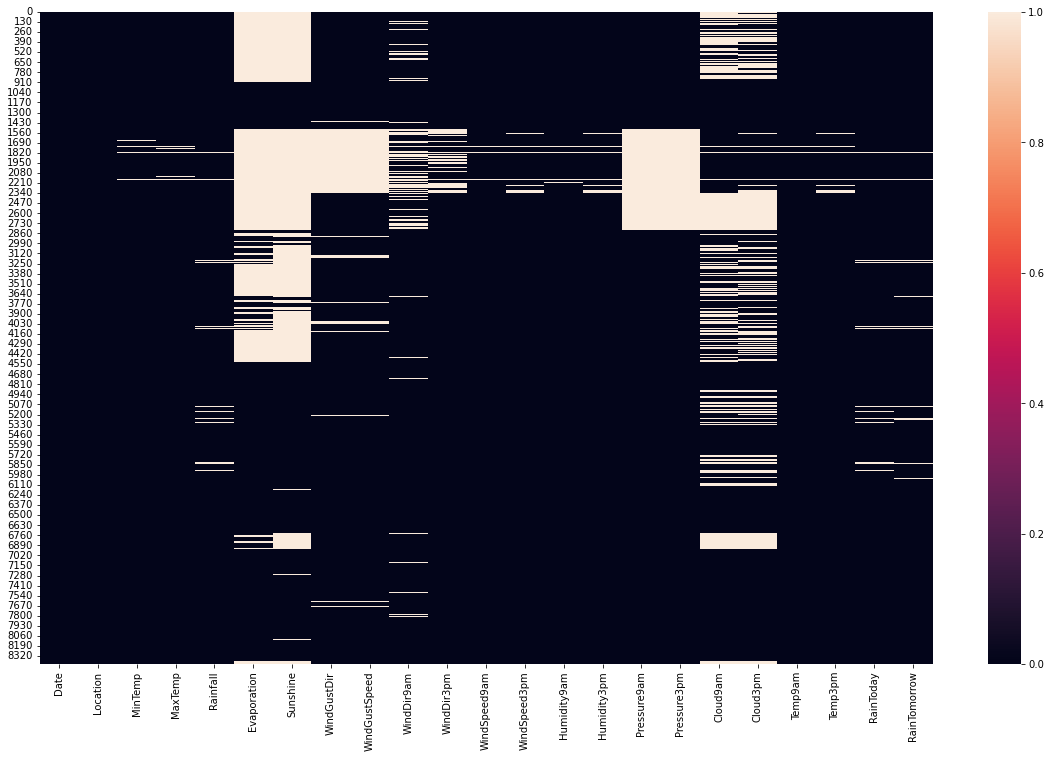

In [89]:
plt.figure(figsize=(20,12))
sns.heatmap(df_rainfall.isnull())

missing values and replacing missing values would be same so doing the same process and fill nan values

In [90]:
# fillinf missing values

mean=['MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
     'Pressure3pm','Pressure9am','Temp9am','Temp3pm']
for i in mean:
    df_rainfall[i]=df_rainfall[i].fillna(df_rainfall[i].mean())
    
df_rainfall.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [91]:
mode=['Rainfall','Evaporation','Sunshine','Cloud9am','Cloud3pm','WindGustDir','WindDir9am',
     'WindDir3pm','RainToday','RainTomorrow']

for j in mode:
    df_rainfall[j]=df_rainfall[j].fillna(df_rainfall[j].mode().max())
df_rainfall.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          4.0       0.0   
1  2008-12-02   Albury      7.4     25.1       0.0          4.0       0.0   
2  2008-12-03   Albury     12.9     25.7       0.0          4.0       0.0   
3  2008-12-04   Albury      9.2     28.0       0.0          4.0       0.0   
4  2008-12-05   Albury     17.5     32.3       1.0          4.0       0.0   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       7.0     16.9     21.8         No   
1       1010.6       1007.8       7.0       7.0     17.2     24.3         No   
2       1007.6       1008.7       7.0       2.0     21.0     23.2         No   
3       1017.6       1012.8       7.0       7.0     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [92]:
df_rainfall.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# (EDA) Exploratory Data Analysis


In [93]:
df_rainfall.describe()


MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.725982     4.810220     4.014042   
std       5.379488     6.114516    10.319872     3.912448     4.744297   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     0.000000   
50%      13.200000    23.300000     0.000000     4.000000     0.200000   
75%      17.300000    28.000000     0.800000     5.200000     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     5.265875     5.230742    17.762015   
std       6.275759     6.217451     2.667166     2.564122     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     7.000000     7.000000    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.442934  
std       5.945849  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.300000  
max      44.100000

From the above description of data we understand that many columns have skewness present as the data is seem to be deviated.

count for all columns are equal that means no more missing values seen.

few columns are having mean mode median equal almost so may be normally distributed

outliers seen in some columns,have to remove by zscore.

<AxesSubplot:>

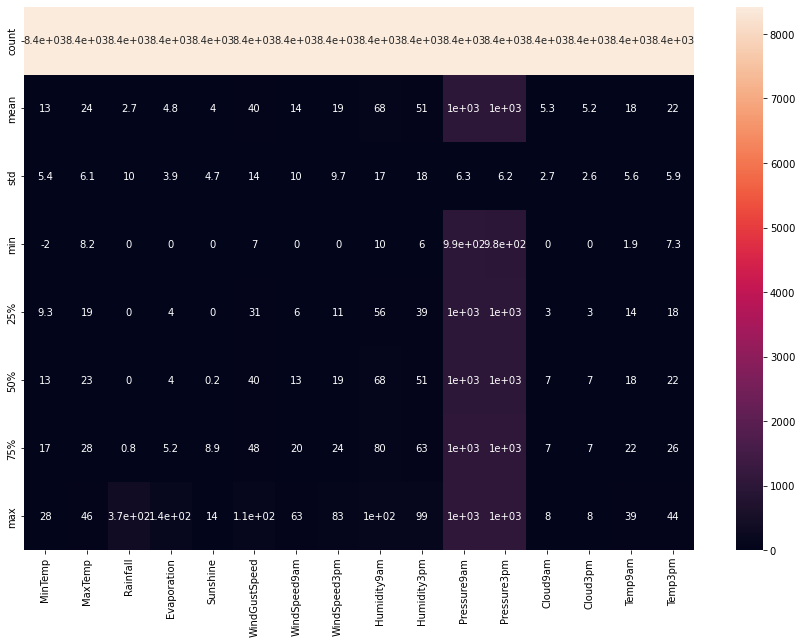

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(df_rainfall.describe(),annot=True)


In [95]:
# Change Date_of_Journey into day and month 
# excluding year as year is same 2019 

df_rainfall['Day'] = pd.to_datetime(df_rainfall['Date'], format="%Y/%m/%d").dt.day
df_rainfall['Month'] = pd.to_datetime(df_rainfall['Date'], format="%Y/%m/%d").dt.month
df_rainfall['Year'] = pd.to_datetime(df_rainfall['Date'], format="%Y/%m/%d").dt.year

df_rainfall.drop('Date',axis=1,inplace=True) #seperated into day,month and year
df_rainfall


Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0      Albury     13.4  22.900000       0.6          4.0       0.0   
1      Albury      7.4  25.100000       0.0          4.0       0.0   
2      Albury     12.9  25.700000       0.0          4.0       0.0   
3      Albury      9.2  28.000000       0.0          4.0       0.0   
4      Albury     17.5  32.300000       1.0          4.0       0.0   
...       ...      ...        ...       ...          ...       ...   
8420    Uluru      2.8  23.400000       0.0          4.0       0.0   
8421    Uluru      3.6  25.300000       0.0          4.0       0.0   
8422    Uluru      5.4  26.900000       0.0          4.0       0.0   
8423    Uluru      7.8  27.000000       0.0          4.0       0.0   
8424    Uluru     14.9  23.859976       0.0          4.0       0.0   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
0              W      44.000000          W        WNW  ...       1007.1   
1            WNW      44.000000        NNW        WSW  ...       1007.8   
2            WSW      46.000000          W        WSW  ...       1008.7   
3             NE      24.000000         SE          E  ...       1012.8   
4              W      41.000000        ENE         NW  ...       1006.0   
...          ...            ...        ...        ...  ...          ...   
8420           E      31.000000         SE        ENE  ...       1020.3   
8421         NNW      22.000000         SE          N  ...       1019.1   
8422           N      37.000000         SE        WNW  ...       1016.8   
8423          SE      28.000000        SSE          N  ...       1016.5   
8424           N      40.174469        ESE        ESE  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
0          8.0       7.0     16.9     21.8         No            No    1   
1          7.0       7.0     17.2     24.3         No            No    2   
2          7.0       2.0     21.0     23.2         No            No    3   
3          7.0       7.0     18.1     26.5         No            No    4   
4          7.0       8.0     17.8     29.7         No            No    5   
...        ...       ...      ...      ...        ...           ...  ...   
8420       7.0       7.0     10.1     22.4         No            No   21   
8421       7.0       7.0     10.9     24.5         No            No   22   
8422       7.0       7.0     12.5     26.1         No            No   23   
8423       3.0       2.0     15.1     26.0         No            No   24   
8424       8.0       8.0     15.0     20.9         No            No   25   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[8425 rows x 25 columns]

<AxesSubplot:title={'center':'Location Bar Chart'}, xlabel='Location', ylabel='Rainfall'>

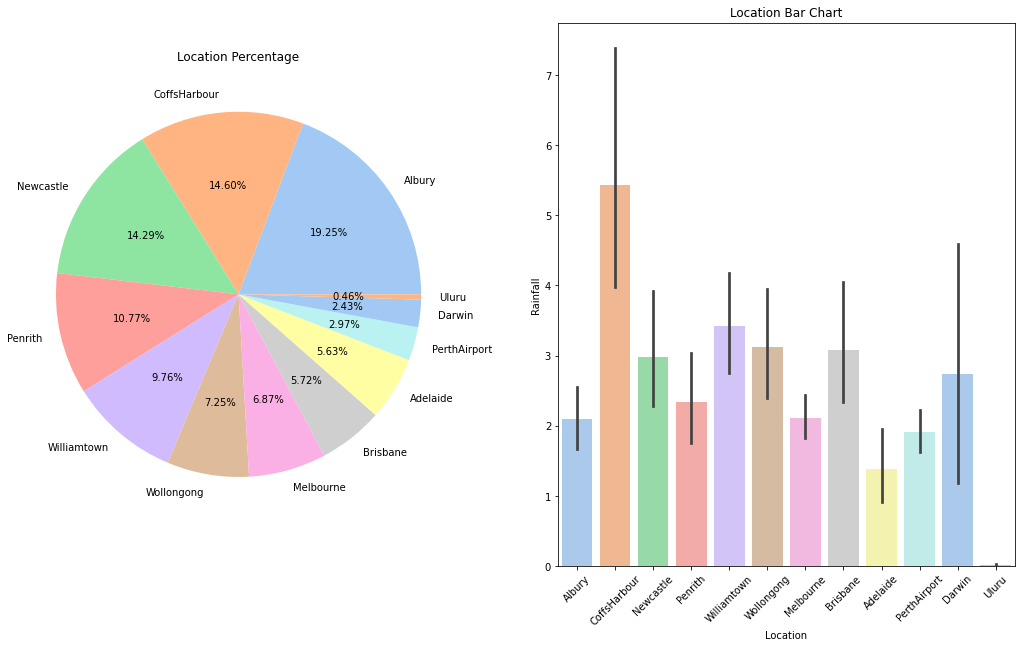

In [96]:
colors=sns.color_palette('pastel')
labels=df_rainfall['Location'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Location Percentage')
plt.pie(df_rainfall['Location'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('Location Bar Chart')
sns.barplot(x="Location", data=df_rainfall, palette=colors,y='Rainfall')


albury has the high dataset for location and highest rainfall is noticed at coffharbour,followed by williamtown



<AxesSubplot:xlabel='Rainfall', ylabel='MaxTemp'>

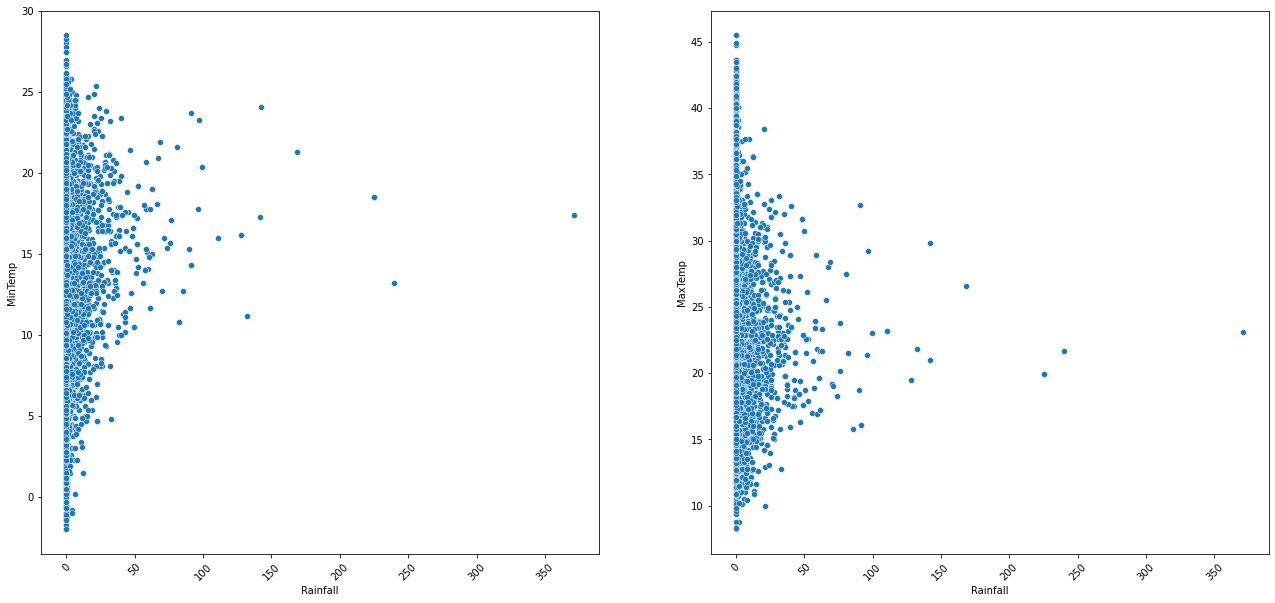

In [97]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='MinTemp',x='Rainfall')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='MaxTemp',x ='Rainfall')


the min temp at which rainfall is high is around 10-20 degrees

and max temp for at which rainfall is high is around 15-25 degrees

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

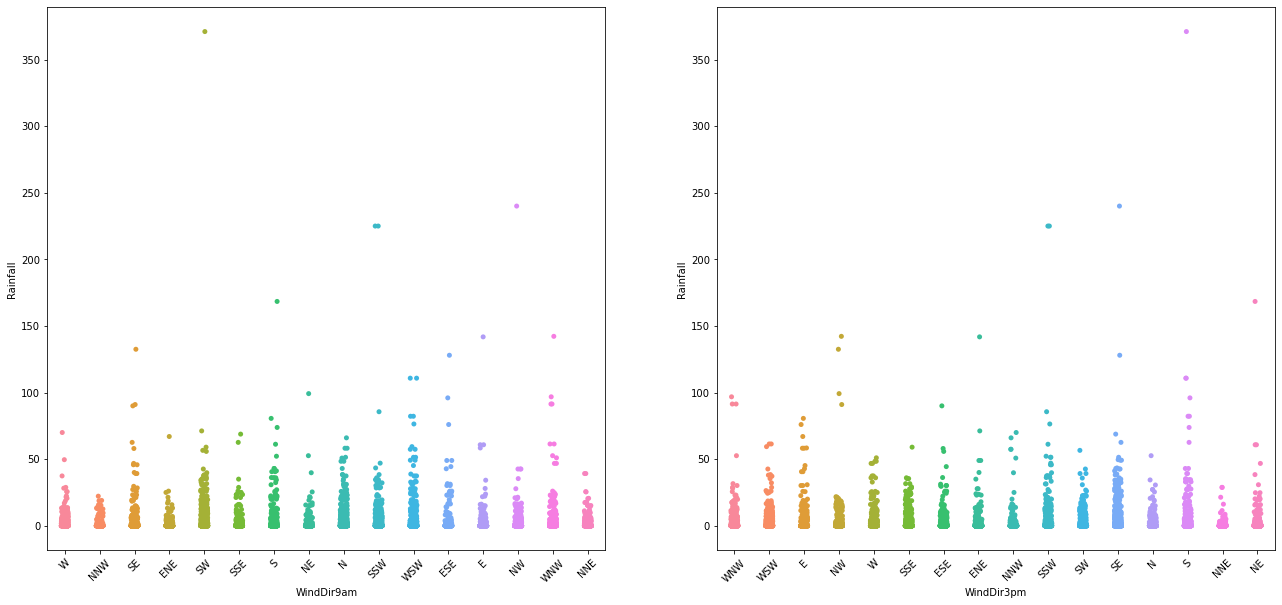

In [98]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.stripplot(data=df_rainfall,y='Rainfall',x='WindDir9am')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.stripplot(data=df_rainfall,y='Rainfall',x ='WindDir3pm')


the graph showing the rainfall at different direction at different time

at morning WSW has high rainfall and at 3pm SSW and SE are having high rainfall

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

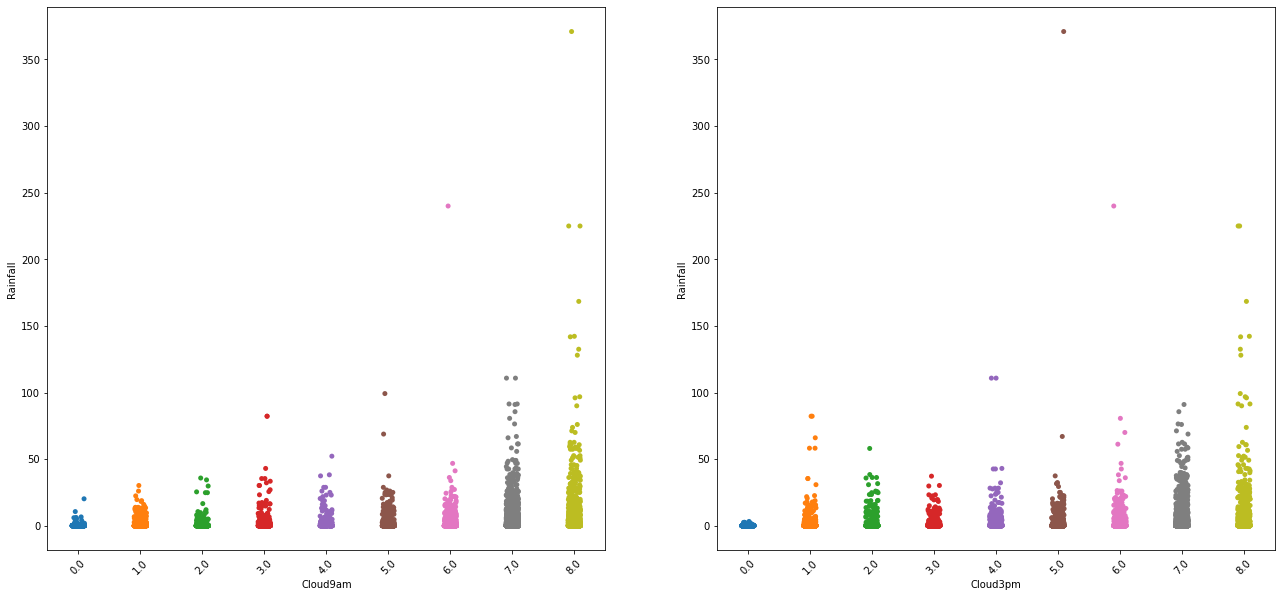

In [99]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.stripplot(data=df_rainfall,y='Rainfall',x='Cloud9am')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.stripplot(data=df_rainfall,y='Rainfall',x ='Cloud3pm')


dense the cloud more the rainfall will be

at cloud 9.0 rainfall is high at both timings



<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

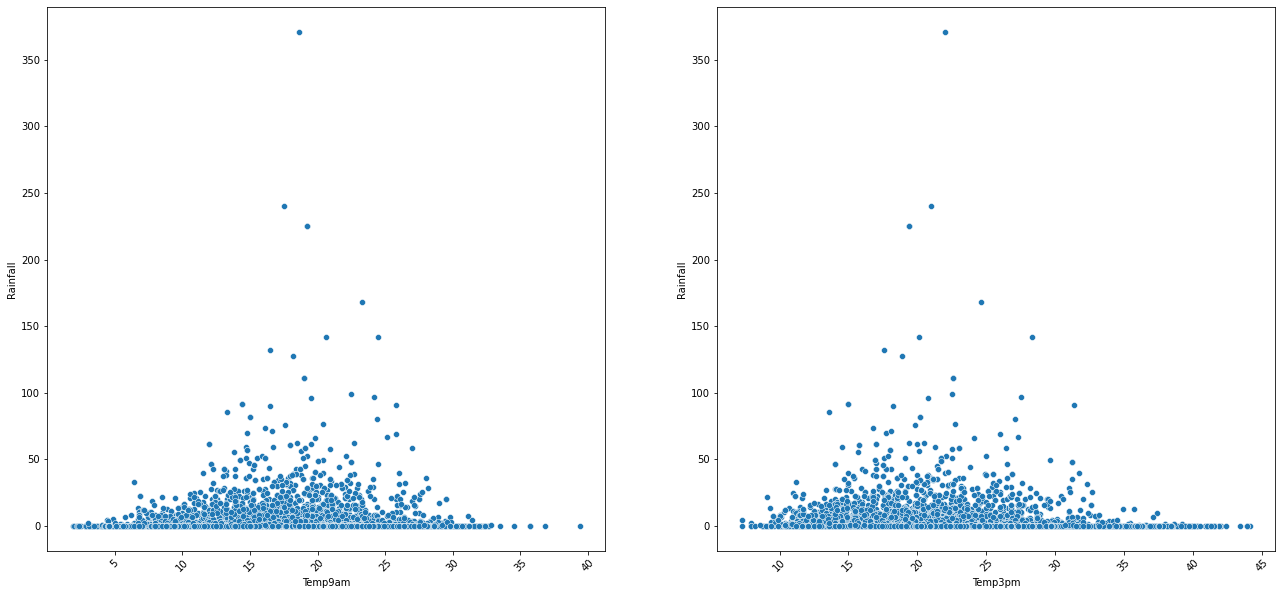

In [100]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='Rainfall',x='Temp9am')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='Rainfall',x ='Temp3pm')


temp 9am and temp 3pm are noticing high rainfall at same range of temperature i.e., 10-25 degrees



<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

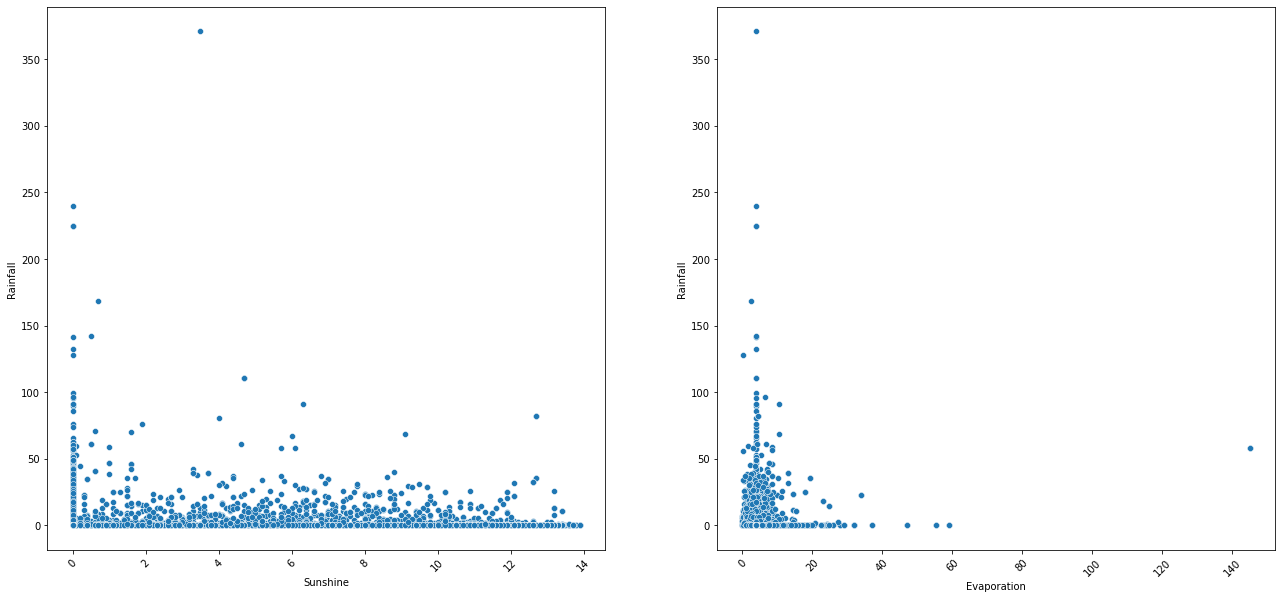

In [101]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='Rainfall',x='Sunshine')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='Rainfall',x ='Evaporation')


less the sunshine and evaporation more the rainfall would be



<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

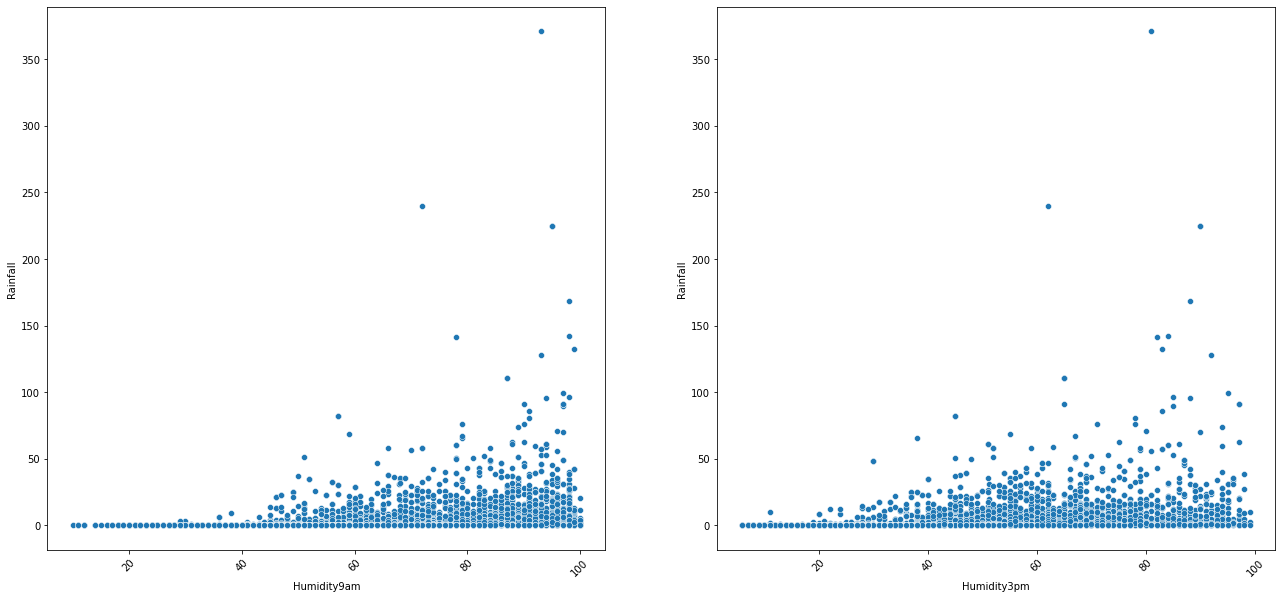

In [102]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='Rainfall',x='Humidity9am')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='Rainfall',x ='Humidity3pm')


<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

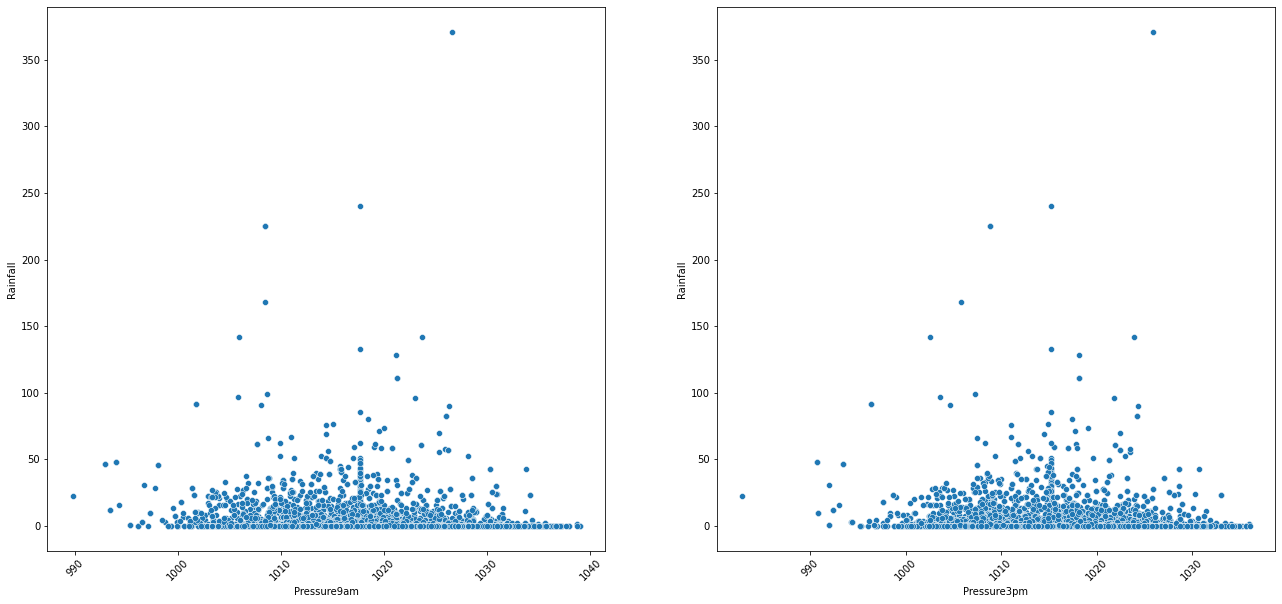

In [103]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='Rainfall',x='Pressure9am')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.scatterplot(data=df_rainfall,y='Rainfall',x ='Pressure3pm')


pressure at different timings with respect to rainfall are shown in the above plot

pressure is dense at 1000-1030 when more rainfall is expected



# Label Encoding


In [104]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_rainfall['Location'] = LE.fit_transform(df_rainfall['Location'])
df_rainfall['WindGustDir'] = LE.fit_transform(df_rainfall['WindGustDir'])
df_rainfall['WindDir9am'] = LE.fit_transform(df_rainfall['WindDir9am'])
df_rainfall['WindDir3pm'] = LE.fit_transform(df_rainfall['WindDir3pm'])
df_rainfall['RainToday'] = LE.fit_transform(df_rainfall['RainToday'])
df_rainfall['RainTomorrow'] = LE.fit_transform(df_rainfall['RainTomorrow'])
df_rainfall.head()


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          4.0       0.0           13   
1         1      7.4     25.1       0.0          4.0       0.0           14   
2         1     12.9     25.7       0.0          4.0       0.0           15   
3         1      9.2     28.0       0.0          4.0       0.0            4   
4         1     17.5     32.3       1.0          4.0       0.0           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1       8.0   
1           44.0           6          15  ...       1007.8       7.0   
2           46.0          13          15  ...       1008.7       7.0   
3           24.0           9           0  ...       1012.8       7.0   
4           41.0           1           7  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0       7.0     16.9     21.8          0             0    1     12  2008  
1       7.0     17.2     24.3          0             0    2     12  2008  
2       2.0     21.0     23.2          0             0    3     12  2008  
3       7.0     18.1     26.5          0             0    4     12  2008  
4       8.0     17.8     29.7          0             0    5     12  2008  

[5 rows x 25 columns]

# CORRELATION

In [105]:
df_rainfall.corr()


Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116531  0.064268  0.005801     0.120376 -0.093480   
MinTemp        0.116531  1.000000  0.717522  0.085723     0.267110  0.135377   
MaxTemp        0.064268  0.717522  1.000000 -0.087710     0.327657  0.286542   
Rainfall       0.005801  0.085723 -0.087710  1.000000     0.016758 -0.087678   
Evaporation    0.120376  0.267110  0.327657  0.016758     1.000000  0.205342   
Sunshine      -0.093480  0.135377  0.286542 -0.087678     0.205342  1.000000   
WindGustDir   -0.035408 -0.145316 -0.224670  0.037106    -0.069158 -0.055204   
WindGustSpeed  0.231396  0.230058  0.139998  0.083374     0.154519  0.074984   
WindDir9am    -0.027103 -0.041650 -0.214119  0.093072    -0.049889 -0.013584   
WindDir3pm    -0.027736 -0.147166 -0.180622  0.038153    -0.048284 -0.062728   
WindSpeed9am   0.221378  0.136872  0.013314  0.048812     0.155717  0.210528   
WindSpeed3pm   0.231801  0.178349  0.088172  0.021654     0.136162  0.167089   
Humidity9am    0.005662 -0.130731 -0.390976  0.227595    -0.250073 -0.379718   
Humidity3pm    0.055790  0.079048 -0.421879  0.234938    -0.174852 -0.312689   
Pressure9am   -0.032261 -0.429432 -0.325721 -0.069604    -0.176155 -0.001555   
Pressure3pm   -0.020574 -0.422991 -0.403258 -0.031268    -0.188242 -0.033321   
Cloud9am       0.033864  0.017254 -0.242183  0.133553    -0.105066 -0.574466   
Cloud3pm       0.008465 -0.038395 -0.242127  0.101161    -0.133774 -0.545069   
Temp9am        0.118051  0.887119  0.866039 -0.007351     0.322802  0.264455   
Temp3pm        0.060570  0.685520  0.974506 -0.090768     0.318246  0.284559   
RainToday      0.003071  0.064789 -0.224883  0.464941    -0.090804 -0.144715   
RainTomorrow   0.002824  0.092942 -0.152886  0.219015    -0.060386 -0.197937   
Day           -0.002019  0.009446  0.015608 -0.013029     0.016783  0.007805   
Month         -0.082407 -0.245854 -0.163253 -0.016258     0.018540  0.019281   
Year           0.486405  0.044123  0.119772  0.004491     0.109725 -0.265601   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.035408       0.231396   -0.027103   -0.027736  ...   
MinTemp          -0.145316       0.230058   -0.041650   -0.147166  ...   
MaxTemp          -0.224670       0.139998   -0.214119   -0.180622  ...   
Rainfall          0.037106       0.083374    0.093072    0.038153  ...   
Evaporation      -0.069158       0.154519   -0.049889   -0.048284  ...   
Sunshine         -0.055204       0.074984   -0.013584   -0.062728  ...   
WindGustDir       1.000000       0.016591    0.403562    0.505799  ...   
WindGustSpeed     0.016591       1.000000   -0.072058    0.071235  ...   
WindDir9am        0.403562      -0.072058    1.000000    0.249527  ...   
WindDir3pm        0.505799       0.071235    0.249527    1.000000  ...   
WindSpeed9am      0.025399       0.600198    0.054272    0.025973  ...   
WindSpeed3pm      0.094623       0.634939    0.047116    0.068799  ...   
Humidity9am       0.036467      -0.269593    0.025604   -0.010312  ...   
Humidity3pm       0.053567      -0.091860    0.124556   -0.012167  ...   
Pressure9am      -0.109704      -0.407139   -0.011024   -0.136517  ...   
Pressure3pm      -0.024997      -0.372651    0.073446   -0.043681  ...   
Cloud9am          0.164227      -0.007313    0.098501    0.087079  ...   
Cloud3pm          0.127633       0.029561    0.066539    0.062069  ...   
Temp9am          -0.176318       0.202298   -0.103111   -0.165072  ...   
Temp3pm          -0.238856       0.102199   -0.221634   -0.194463  ...   
RainToday         0.125188       0.076822    0.157324    0.100125  ...   
RainTomorrow      0.051832       0.190127    0.032860    0.008918  ...   
Day               0.015683      -0.002876   -0.015154    0.003089  ...   
Month             0.034823       0.051968    0.012544    0.029384  ...   
Year             -0.088340      -0.042402   -0.014498   -0.005812  ...   

         

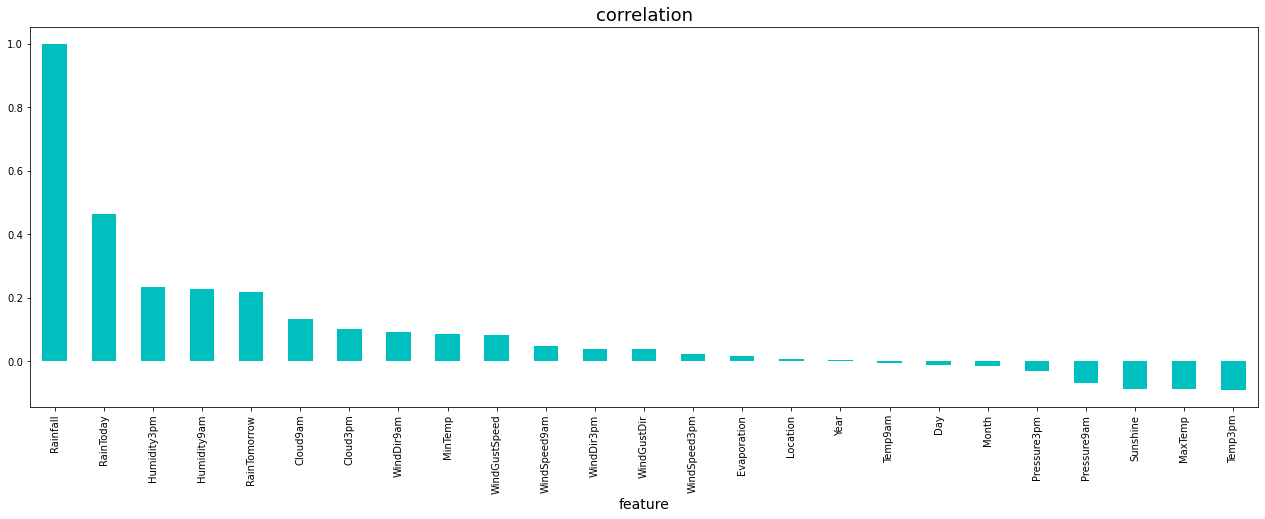

In [106]:
plt.figure(figsize=(22,7))
df_rainfall.corr()['Rainfall'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

<AxesSubplot:>

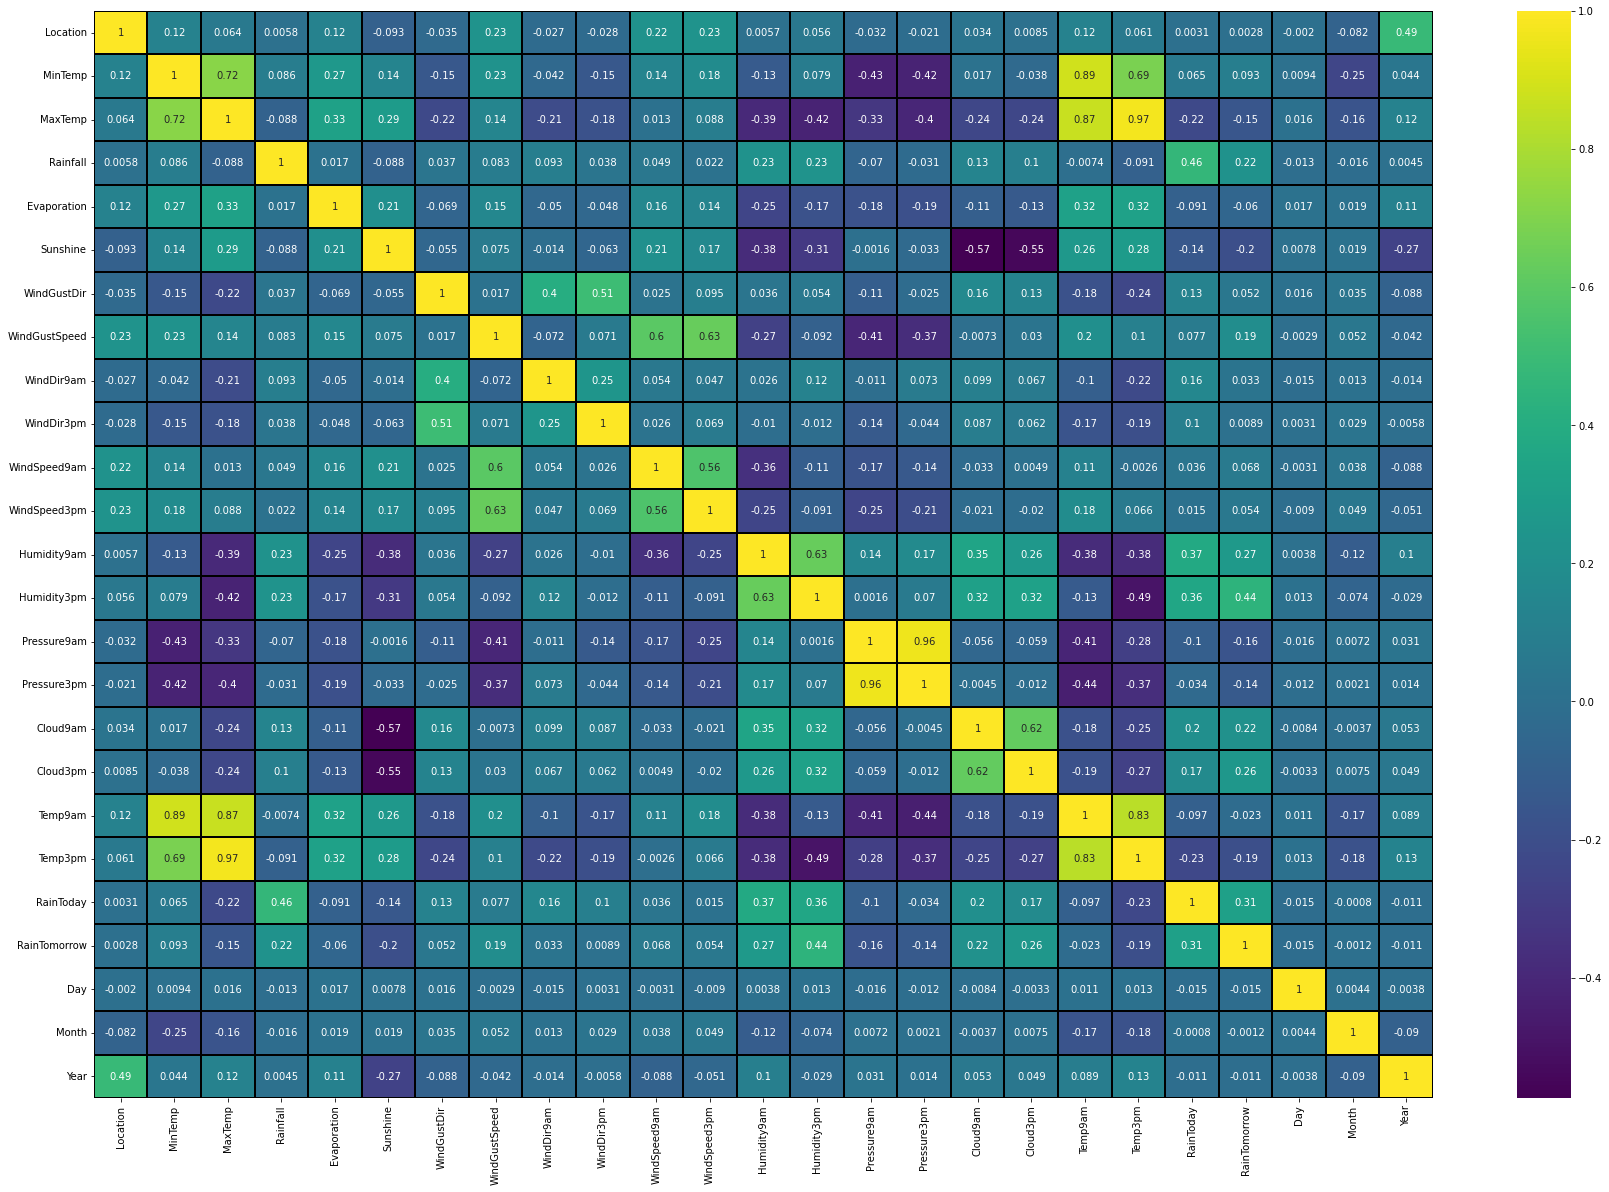

In [107]:
plt.figure(figsize=(30,20))
sns.heatmap(df_rainfall.corr(),cmap='viridis',annot=True,linecolor='black',linewidths=0.2)

TEMP 3PM IS CORRELATED TO TEMP 9AM.

PRESSURE 3PM IS CORRELATED WITH 9AM.

HUMIDTY ,WINDSPEED,MAX MIN TEMP ARE CORRELATED.

MULTICOLLINEARITY MAY BE PRESENT WE WILL CHECK FUTHER.



# CHECKING OUTLIERS


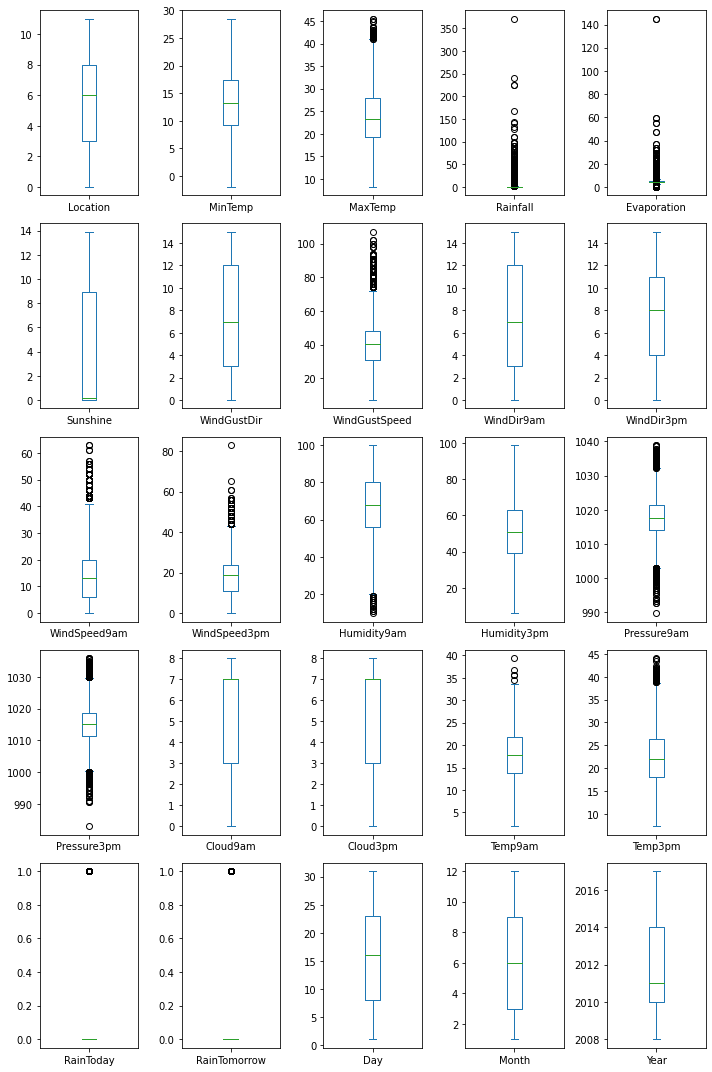

In [108]:
df_rainfall.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,15))
plt.tight_layout()

OUTLIERS PRESENT IN DATA

'MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm'

# REMOVING OUTLIERS BY ZSCORE


In [109]:
from scipy.stats import zscore
variable=df_rainfall[['MaxTemp','Rainfall','Evaporation','WindGustSpeed'
            ,'WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm'
            ,'Temp9am','Temp3pm']]
z=np.abs(zscore(variable))


In [110]:
z

MaxTemp  Rainfall  Evaporation  WindGustSpeed  WindSpeed9am  \
0     1.570089e-01  0.206021       0.2071       0.277710      0.607461   
1     2.028121e-01  0.264165       0.2071       0.277710      0.972321   
2     3.009450e-01  0.264165       0.2071       0.422897      0.508725   
3     6.771214e-01  0.264165       0.2071       1.174166      0.281166   
4     1.380408e+00  0.167258       0.2071       0.059928      0.676112   
...            ...       ...          ...            ...           ...   
8420  7.523137e-02  0.264165       0.2071       0.666009      0.083694   
8421  2.355231e-01  0.264165       0.2071       1.319354      0.083694   
8422  4.972110e-01  0.264165       0.2071       0.230447      0.478639   
8423  5.135665e-01  0.264165       0.2071       0.883791      0.083694   
8424  2.905320e-15  0.264165       0.2071       0.000000      0.311252   

      WindSpeed3pm  Humidity9am  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0         0.563297     0.189439     1.584003     1.308665  0.153712  0.108138  
1         0.357200     1.420268     1.121880     1.196072  0.100217  0.312348  
2         0.769394     1.777981     1.599939     1.051309  0.577390  0.127334  
3         0.982428     1.360650     0.006411     0.391836  0.060269  0.682376  
4         0.151104     0.845246     1.090010     1.485596  0.006773  1.220599  
...            ...          ...          ...          ...       ...       ...  
8420      0.776331     1.002937     1.109058     0.814518  1.366273  0.007221  
8421      0.982428     0.704843     0.933770     0.621501  1.223619  0.345987  
8422      0.982428     0.883699     0.535388     0.251553  0.938310  0.615099  
8423      1.188525     1.002937     0.280424     0.203299  0.474684  0.598279  
8424      0.158041     0.347130     0.407906     0.428485  0.492516  0.259513  

[8425 rows x 11 columns]

In [111]:
threshold=3
print(np.where(z>3))


(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
        683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
       2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
       3059, 3060, 3066, 3067, 3067, 3067, 3068, 3

In [112]:
df1_rainfall=df_rainfall[(z<3).all(axis=1)]
df1_rainfall


Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000       0.6          4.0       0.0   
1            1      7.4  25.100000       0.0          4.0       0.0   
2            1     12.9  25.700000       0.0          4.0       0.0   
3            1      9.2  28.000000       0.0          4.0       0.0   
4            1     17.5  32.300000       1.0          4.0       0.0   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000       0.0          4.0       0.0   
8421         9      3.6  25.300000       0.0          4.0       0.0   
8422         9      5.4  26.900000       0.0          4.0       0.0   
8423         9      7.8  27.000000       0.0          4.0       0.0   
8424         9     14.9  23.859976       0.0          4.0       0.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13      44.000000          13          14  ...       1007.1   
1              14      44.000000           6          15  ...       1007.8   
2              15      46.000000          13          15  ...       1008.7   
3               4      24.000000           9           0  ...       1012.8   
4              13      41.000000           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420            0      31.000000           9           1  ...       1020.3   
8421            6      22.000000           9           3  ...       1019.1   
8422            3      37.000000           9          14  ...       1016.8   
8423            9      28.000000          10           3  ...       1016.5   
8424            3      40.174469           2           2  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
0          8.0       7.0     16.9     21.8          0             0    1   
1          7.0       7.0     17.2     24.3          0             0    2   
2          7.0       2.0     21.0     23.2          0             0    3   
3          7.0       7.0     18.1     26.5          0             0    4   
4          7.0       8.0     17.8     29.7          0             0    5   
...        ...       ...      ...      ...        ...           ...  ...   
8420       7.0       7.0     10.1     22.4          0             0   21   
8421       7.0       7.0     10.9     24.5          0             0   22   
8422       7.0       7.0     12.5     26.1          0             0   23   
8423       3.0       2.0     15.1     26.0          0             0   24   
8424       8.0       8.0     15.0     20.9          0             0   25   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[7985 rows x 25 columns]

# Separating label and feature


In [113]:
#independent column
X=df1_rainfall.drop(['Rainfall'],axis=1)
#target
Y=df1_rainfall['Rainfall']


In [114]:
x.shape


(12326, 21)

In [115]:
y.shape


(12326,)

# Skewness Check


In [116]:
df1_rainfall.skew()


Location        -0.039906
MinTemp         -0.084083
MaxTemp          0.314960
Rainfall         3.518548
Evaporation      1.507592
Sunshine         0.593873
WindGustDir      0.111985
WindGustSpeed    0.506813
WindDir9am       0.159615
WindDir3pm      -0.126046
WindSpeed9am     0.711043
WindSpeed3pm     0.299983
Humidity9am     -0.231718
Humidity3pm      0.124767
Pressure9am      0.020309
Pressure3pm      0.044493
Cloud9am        -0.846363
Cloud3pm        -0.783947
Temp9am         -0.037698
Temp3pm          0.334696
RainToday        1.300783
RainTomorrow     1.295690
Day              0.003167
Month            0.054642
Year             0.430639
dtype: float64

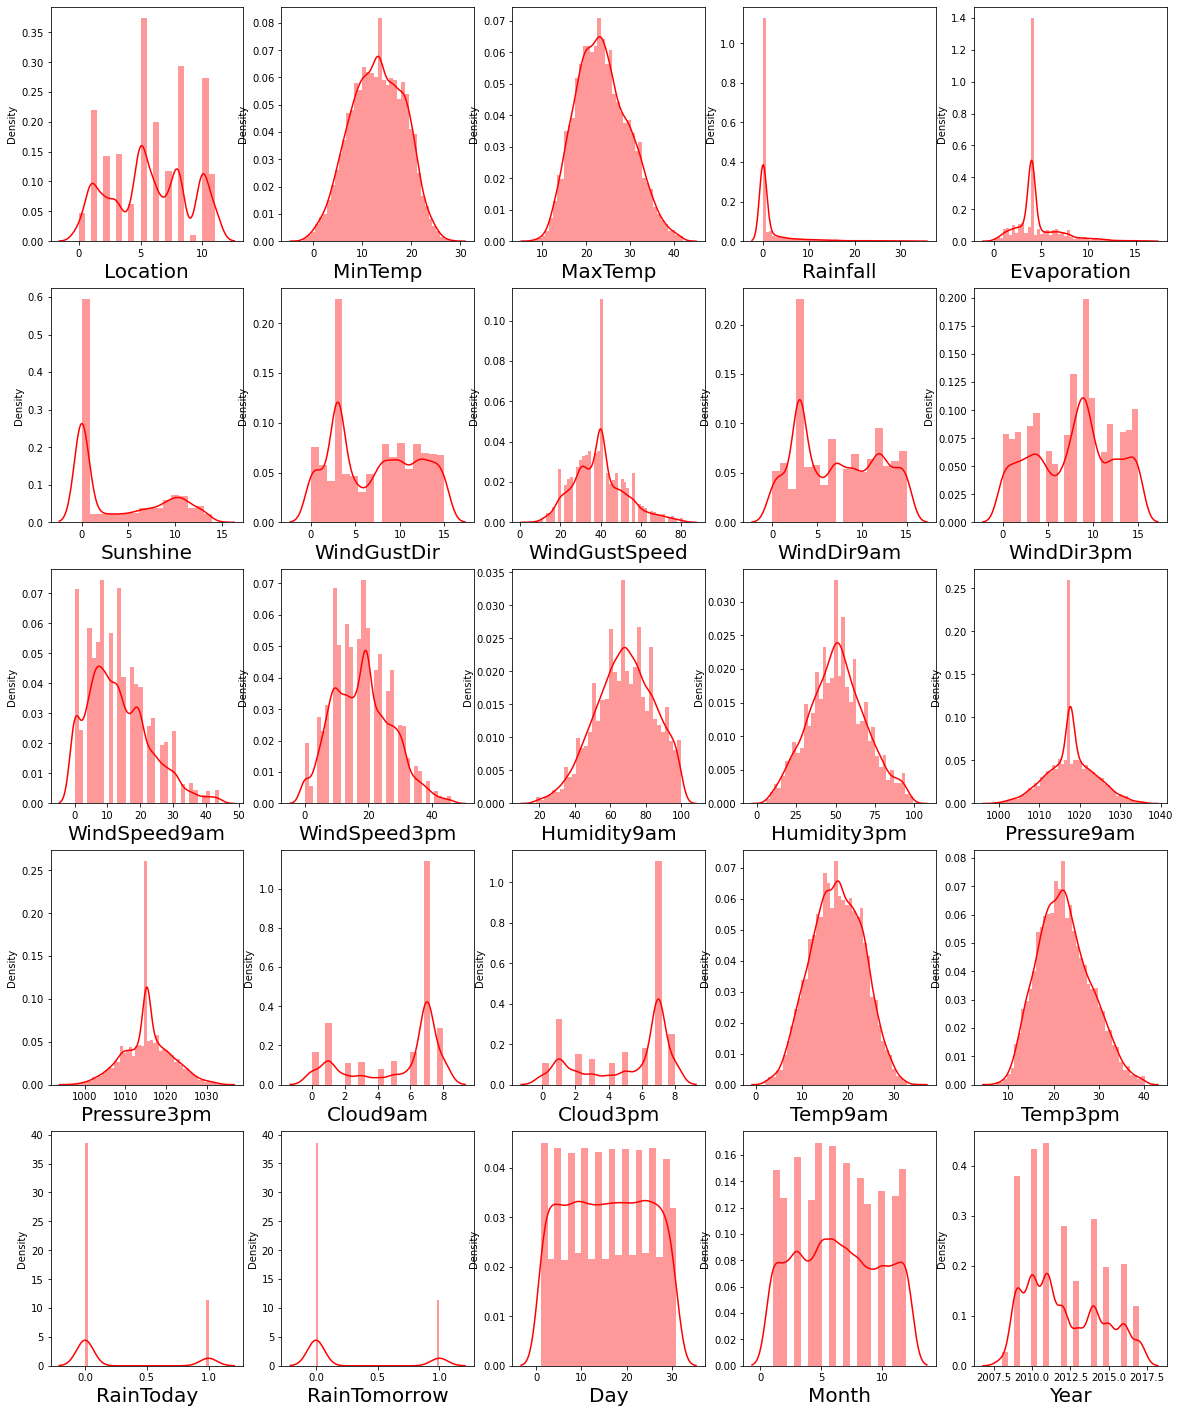

In [117]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df1_rainfall.columns:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df1_rainfall[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


Evaporation,Rainfall,Sunshine,Cloud9am,Cloud3pm are having skewness and hence removing them

In [118]:
from sklearn.preprocessing import power_transform

df1_rainfall['Evaporation']=power_transform(df1_rainfall,method='yeo-johnson')
df1_rainfall['Rainfall']=power_transform(df1_rainfall,method='yeo-johnson')
df1_rainfall['Sunshine']=power_transform(df1_rainfall,method='yeo-johnson')
df1_rainfall['Cloud9am']=power_transform(df1_rainfall,method='yeo-johnson')
df1_rainfall['Cloud3pm']=power_transform(df1_rainfall,method='yeo-johnson')

df1_rainfall.head()


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9 -1.568315    -1.568315 -1.568315           13   
1         1      7.4     25.1 -1.568315    -1.568315 -1.568315           14   
2         1     12.9     25.7 -1.568315    -1.568315 -1.568315           15   
3         1      9.2     28.0 -1.568315    -1.568315 -1.568315            4   
4         1     17.5     32.3 -1.568315    -1.568315 -1.568315           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1 -1.568315   
1           44.0           6          15  ...       1007.8 -1.568315   
2           46.0          13          15  ...       1008.7 -1.568315   
3           24.0           9           0  ...       1012.8 -1.568315   
4           41.0           1           7  ...       1006.0 -1.568315   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0 -1.568315     16.9     21.8          0             0    1     12  2008  
1 -1.568315     17.2     24.3          0             0    2     12  2008  
2 -1.568315     21.0     23.2          0             0    3     12  2008  
3 -1.568315     18.1     26.5          0             0    4     12  2008  
4 -1.568315     17.8     29.7          0             0    5     12  2008  

[5 rows x 25 columns]

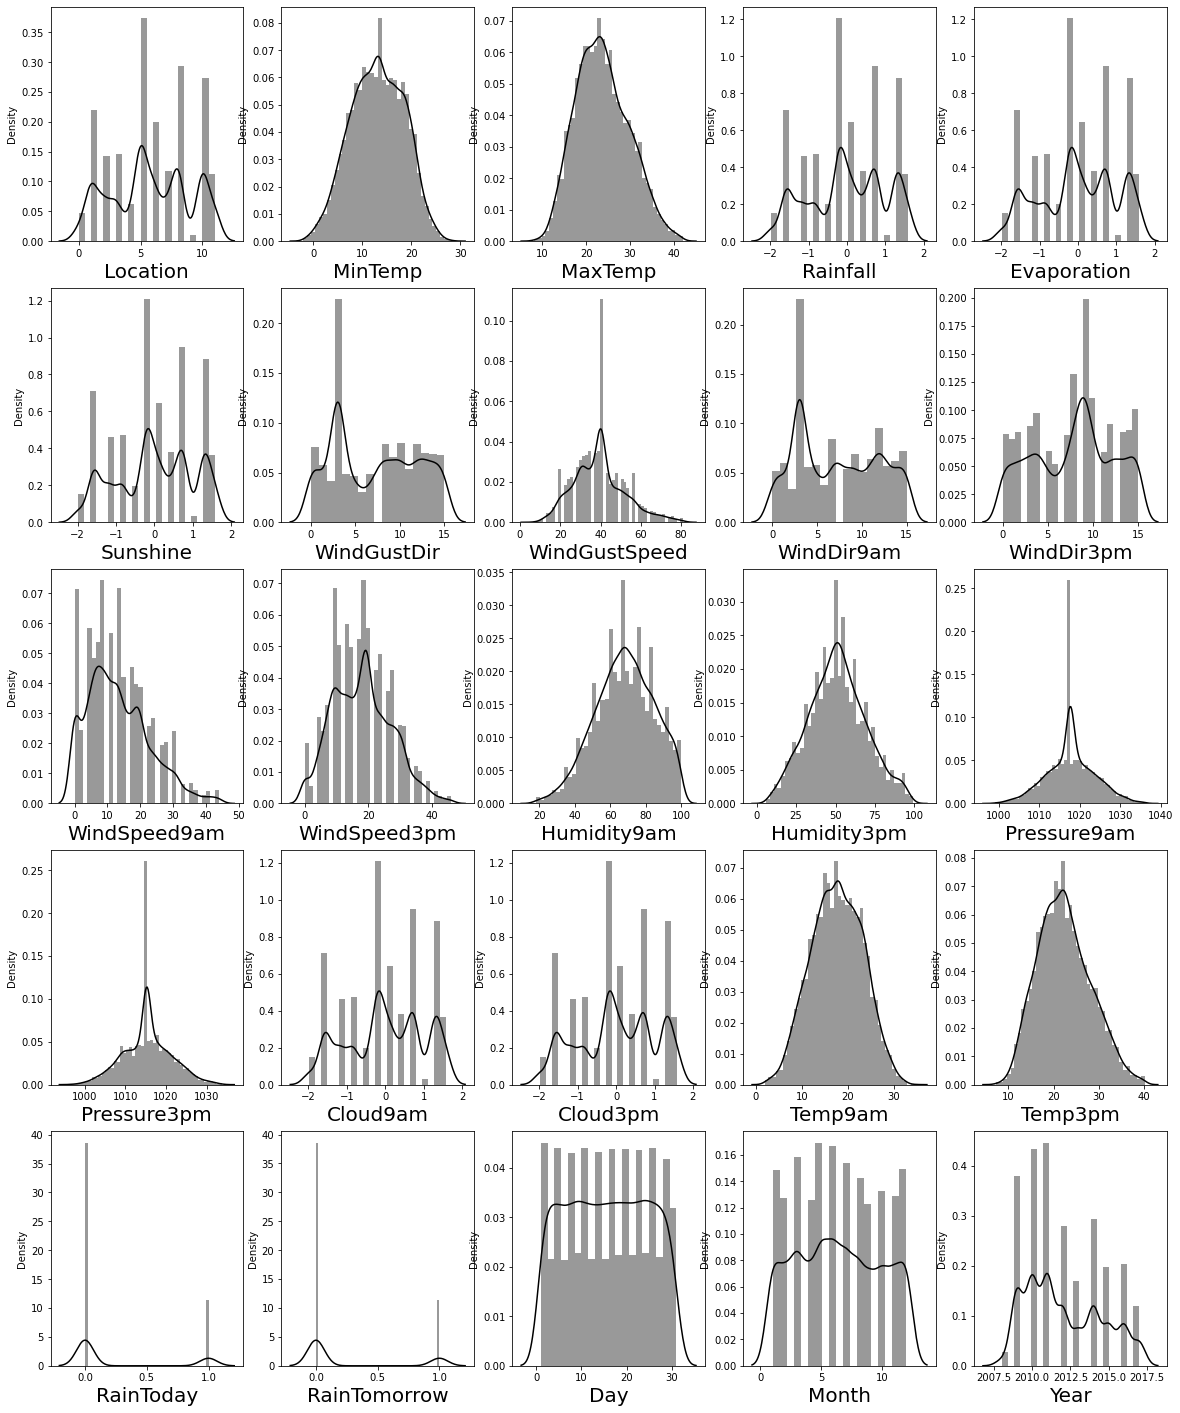

In [119]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df1_rainfall.columns:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df1_rainfall[column],color='black')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


# Scaling

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0 -1.508244  0.056720 -0.145362    -0.233788 -0.848811     1.229051   
1 -1.508244 -1.058229  0.221115    -0.233788 -0.848811     1.441765   
2 -1.508244 -0.036193  0.321064    -0.233788 -0.848811     1.654478   
3 -1.508244 -0.723744  0.704199    -0.233788 -0.848811    -0.685372   
4 -1.508244  0.818601  1.420496    -0.233788 -0.848811     1.229051   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0       0.364051    1.249991    1.400119      0.712706  ...    -1.398140   
1       0.364051   -0.278086    1.626475     -0.987398  ...    -1.280023   
2       0.520459    1.249991    1.626475      0.606449  ...    -1.128157   
3      -1.200030    0.376804   -1.768865     -0.243603  ...    -0.436325   
4       0.129439   -1.369569   -0.184373     -0.668628  ...    -1.583754   

   Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow       Day  \
0  1.032477  0.700800 -0.137764 -0.098234  -0.542563     -0.543723 -1.671471   
1  0.658618  0.700800 -0.083912  0.330173  -0.542563     -0.543723 -1.557781   
2  0.658618 -1.244514  0.598213  0.141674  -0.542563     -0.543723 -1.444092   
3  0.658618  0.700800  0.077644  0.707171  -0.542563     -0.543723 -1.330402   
4  0.658618  1.089863  0.023792  1.255531  -0.542563     -0.543723 -1.216713   

      Month      Year  
0  1.634864 -1.661238  
1  1.634864 -1.661238  
2  1.634864 -1.661238  
3  1.634864 -1.661238  
4  1.634864 -1.661238  

[5 rows x 24 columns]

# Checking varience inflation factor

In [121]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif


VIF values       Features
0     1.575006       Location
1     8.625387        MinTemp
2    26.449595        MaxTemp
3     1.560323    Evaporation
4     2.212944       Sunshine
5     1.636092    WindGustDir
6     2.421798  WindGustSpeed
7     1.349017     WindDir9am
8     1.487926     WindDir3pm
9     2.087474   WindSpeed9am
10    1.984992   WindSpeed3pm
11    3.938879    Humidity9am
12    5.637652    Humidity3pm
13   19.947248    Pressure9am
14   19.116778    Pressure3pm
15    2.123102       Cloud9am
16    1.898305       Cloud3pm
17   17.994658        Temp9am
18   33.349580        Temp3pm
19    1.363418      RainToday
20    1.423266   RainTomorrow
21    1.004801            Day
22    1.152670          Month
23    1.646953           Year

very high VIF is seen in temp3pm so dropping it and then one by one

VIF should be less than 10

In [122]:
X.drop("Temp3pm",axis=1,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

VIF values       Features
0     1.574386       Location
1     8.583971        MinTemp
2     9.517905        MaxTemp
3     1.560084    Evaporation
4     2.197480       Sunshine
5     1.633392    WindGustDir
6     2.405998  WindGustSpeed
7     1.348304     WindDir9am
8     1.486844     WindDir3pm
9     2.085910   WindSpeed9am
10    1.983435   WindSpeed3pm
11    3.481719    Humidity9am
12    3.833401    Humidity3pm
13   19.362026    Pressure9am
14   18.619878    Pressure3pm
15    2.122233       Cloud9am
16    1.891000       Cloud3pm
17   16.622397        Temp9am
18    1.362992      RainToday
19    1.423260   RainTomorrow
20    1.004328            Day
21    1.138435          Month
22    1.646818           Year

In [123]:
X.drop("Pressure9am",axis=1,inplace=True)


In [124]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif


VIF values       Features
0     1.574327       Location
1     8.469273        MinTemp
2     9.124169        MaxTemp
3     1.550438    Evaporation
4     2.191097       Sunshine
5     1.620402    WindGustDir
6     2.383480  WindGustSpeed
7     1.327377     WindDir9am
8     1.415028     WindDir3pm
9     2.085841   WindSpeed9am
10    1.974000   WindSpeed3pm
11    3.480474    Humidity9am
12    3.832935    Humidity3pm
13    1.472483    Pressure3pm
14    2.122164       Cloud9am
15    1.886565       Cloud3pm
16   16.551594        Temp9am
17    1.348904      RainToday
18    1.419422   RainTomorrow
19    1.003722            Day
20    1.137786          Month
21    1.644129           Year

In [125]:
X.drop("Temp9am",axis=1,inplace=True)


In [126]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif


VIF values       Features
0     1.572035       Location
1     4.346443        MinTemp
2     5.311310        MaxTemp
3     1.549277    Evaporation
4     2.189250       Sunshine
5     1.616583    WindGustDir
6     2.347884  WindGustSpeed
7     1.327354     WindDir9am
8     1.414128     WindDir3pm
9     2.053751   WindSpeed9am
10    1.925294   WindSpeed3pm
11    2.439540    Humidity9am
12    3.094994    Humidity3pm
13    1.468468    Pressure3pm
14    2.090942       Cloud9am
15    1.876405       Cloud3pm
16    1.345859      RainToday
17    1.419309   RainTomorrow
18    1.003511            Day
19    1.125030          Month
20    1.611197           Year

Finally dropped all columns whiose VIF was above 10

now no multicolinearity seen can move forward for model building



# Splitting the DataFrame


In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 93)

# Model Building

# 1) LinearRegression


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
predlr=lr.predict(X_test)


print('Score: ',lr.score(X_train,Y_train))
print('r2 score: ', r2_score(Y_test,predlr))


# printing errors

print('Mean absolute error:', mean_absolute_error(Y_test,predlr))
print('Mean squared error:', mean_squared_error(Y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test,predlr)))

Score:  0.501614062579741
r2 score:  0.48201730397787934
Mean absolute error: 1.586932981934047
Mean squared error: 12.610155493401532
Root mean squared error: 3.551078074810737


In [129]:
#Cross Validation

test_accuracy= r2_score(Y_test,predlr)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,X,Y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy Score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 48.778023137066256 and Accuracy Score is 48.201730397787934
At cross fold 3 the Cross Val score is 48.73833681315878 and Accuracy Score is 48.201730397787934
At cross fold 4 the Cross Val score is 48.588675969331995 and Accuracy Score is 48.201730397787934
At cross fold 5 the Cross Val score is 49.091052298209966 and Accuracy Score is 48.201730397787934
At cross fold 6 the Cross Val score is 48.892049745288624 and Accuracy Score is 48.201730397787934
At cross fold 7 the Cross Val score is 48.80455141425863 and Accuracy Score is 48.201730397787934
At cross fold 8 the Cross Val score is 48.955216373589536 and Accuracy Score is 48.201730397787934
At cross fold 9 the Cross Val score is 48.92822149876235 and Accuracy Score is 48.201730397787934


# 2) DecisionTreeRegressor


In [130]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
dtr.score(X_train,Y_train)
dtr_pred=dtr.predict(X_test)


print('score : ',dtr.score(X_train,Y_train))
print('r2 score : ',r2_score(Y_test,dtr_pred))

# printing errors

print('Mean absolute error:', mean_absolute_error(Y_test,dtr_pred))
print('Mean squared error:', mean_squared_error(Y_test,dtr_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test,dtr_pred)))

score :  1.0
r2 score :  0.3313199167457327
Mean absolute error: 1.2211155378486056
Mean squared error: 16.278844621513944
Root mean squared error: 4.034705022862755


In [131]:
#Cross Validation

# DESICION TREE

test_accuracy= r2_score(Y_test,dtr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dtr,X,Y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy Score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 18.304371458711238 and Accuracy Score is 33.13199167457327
At cross fold 3 the Cross Val score is 13.59377437141892 and Accuracy Score is 33.13199167457327
At cross fold 4 the Cross Val score is -1.4430475996881797 and Accuracy Score is 33.13199167457327
At cross fold 5 the Cross Val score is 25.491153455391668 and Accuracy Score is 33.13199167457327
At cross fold 6 the Cross Val score is 18.14291443262715 and Accuracy Score is 33.13199167457327
At cross fold 7 the Cross Val score is 27.626850492443783 and Accuracy Score is 33.13199167457327
At cross fold 8 the Cross Val score is 30.69202877664618 and Accuracy Score is 33.13199167457327
At cross fold 9 the Cross Val score is 35.68194341394302 and Accuracy Score is 33.13199167457327


# 3) RandomForestRegressor


In [132]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
print('Score: ',rf.score(X_train,Y_train))
print('r2 score: ', r2_score(Y_test,predrf))

# printing errors

print('Mean absolute error:', mean_absolute_error(Y_test,predrf))
print('Mean squared error:', mean_squared_error(Y_test,predrf))

print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test,predrf)))

Score:  0.9470731469762311
r2 score:  0.6269139193217823
Mean absolute error: 1.1279055207740467
Mean squared error: 9.082684664769495
Root mean squared error: 3.013749270388878


In [133]:
# cross validation
# RANDOM FOREST REGRESSOR
test_accuracy= r2_score(Y_test,predrf)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rf,X,Y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy Score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 51.37231495678839 and Accuracy Score is 62.691391932178234
At cross fold 3 the Cross Val score is 52.278617840151476 and Accuracy Score is 62.691391932178234
At cross fold 4 the Cross Val score is 49.75015075746403 and Accuracy Score is 62.691391932178234
At cross fold 5 the Cross Val score is 57.73370581944584 and Accuracy Score is 62.691391932178234
At cross fold 6 the Cross Val score is 58.07449418339954 and Accuracy Score is 62.691391932178234
At cross fold 7 the Cross Val score is 60.084685498132096 and Accuracy Score is 62.691391932178234
At cross fold 8 the Cross Val score is 61.29090704155682 and Accuracy Score is 62.691391932178234
At cross fold 9 the Cross Val score is 64.0654295612656 and Accuracy Score is 62.691391932178234


# RANDOMFOREST showing great results so tuning this model


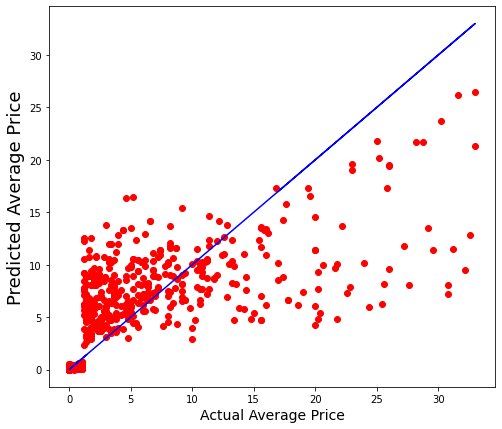

In [134]:
plt.figure(figsize=(8,7))
plt.scatter(x=Y_test, y= predrf, color='r')
plt.plot(Y_test,Y_test, color='b')
plt.xlabel('Actual Average Price', fontsize= 14 )
plt.ylabel('Predicted Average Price', fontsize= 18)
plt.show()

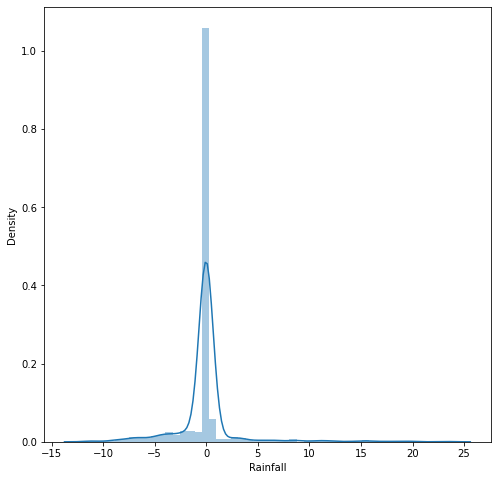

In [135]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-predrf)
plt.show()


# saving our model


In [136]:
import pickle
# open a file, where you want to store the data
file = open('Rainfall_density.pkl', 'wb')

# dump information to that file
pickle.dump(predrf, file)
